# Data Description and Forecasted Variable
The data, sourced from Kaggle.com, contains information on 132 types of fruits/vegetables, including their average, maximum, and minimum prices recorded daily over a span of nine years (2013-2021). For the purposes of this project, one fruit (Bitter Gourd) was selected, with its price recorded 2,670 times. The forecasted variable is the average price of this fruit.




# 1. Loading and preparing the data
The daily data was aggregated into monthly data. Subsequently, checks were made for missing values (none found), outliers (2 identified), and a calendar adjustment was applied.

In [5]:
library(dplyr)
library(lubridate)
library(zoo)
library(arima2)
library(forecast)
library(stats)


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [69]:
# Loading the data
data <- read.csv("C:/Users/barte/OneDrive/Pulpit/north/fruits.csv")
head(data)
table(data$Commodity)
unique(data$Commodity)

,SN,Commodity,Date,Unit,Minimum,Maximum,Average
,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,0,Tomato Big(Nepali),2013-06-16,Kg,35,40,37.5
2,1,Tomato Small(Local),2013-06-16,Kg,26,32,29.0
3,2,Potato Red,2013-06-16,Kg,20,21,20.5
4,3,Potato White,2013-06-16,Kg,15,16,15.5
5,4,Onion Dry (Indian),2013-06-16,Kg,28,30,29.0
6,5,Carrot(Local),2013-06-16,Kg,30,35,32.5



          Apple(Fuji)         Apple(Jholey)                  Arum 
                  395                  2683                  2020 
            Asparagus                Bakula          Bamboo Shoot 
                 1055                  1131                  2744 
               Banana                Barela       Bauhania flower 
                 2744                  1390                   286 
         Bitter Gourd          Bottle Gourd      Brd Leaf Mustard 
                 2670                  2700                  2742 
         Brinjal Long         Brinjal Round              Brocauli 
                 2736                  1996                  1870 
              Cabbage        Cabbage(Local)        Cabbage(Terai) 
                  288                  2749                   248 
             Capsicum         Carrot(Local)         Carrot(Terai) 
                 2725                  2736                   310 
          Cauli Local    Cauli Local(Jyapu)           Cauli T

[1] "Tomato Big(Nepali)"    "Tomato Small(Local)"   "Potato Red"           
  [4] "Potato White"          "Onion Dry (Indian)"    "Carrot(Local)"        
  [7] "Cabbage(Local)"        "Cauli Local"           "Raddish Red"          
 [10] "Raddish White(Local)"  "Brinjal Long"          "Brinjal Round"        
 [13] "Cow pea(Long)"         "Green Peas"            "French Bean(Local)"   
 [16] "Soyabean Green"        "Bitter Gourd"          "Bottle Gourd"         
 [19] "Pointed Gourd(Local)"  "Snake Gourd"           "Smooth Gourd"         
 [22] "Sponge Gourd"          "Pumpkin"               "Squash(Long)"         
 [25] "Turnip"                "Okara"                 "Christophine"         
 [28] "Brd Leaf Mustard"      "Spinach Leaf"          "Cress Leaf"           
 [31] "Mustard Leaf"          "Fenugreek Leaf"        "Onion Green"          
 [34] "Mushroom(Kanya)"       "Asparagus"             "Neuro"                
 [37] "Brocauli"              "Sugarbeet"             "Drumstick"            
 [40] "Red Cabbbage"          "Lettuce"               "Celery"               
 [43] "Parseley"              "Fennel Leaf"           "Mint"                 
 [46] "Turnip A"              "Tamarind"              "Bamboo Shoot"         
 [49] "Tofu"                  "Gundruk"               "Apple(Jholey)"        
 [52] "Banana"                "Lime"                  "Pomegranate"          
 [55] "Mango(Maldah)"         "Grapes(Green)"         "Water Melon(Green)"   
 [58] "Sweet Orange"          "Pineapple"             "Cucumber(Local)"      
 [61] "Jack Fruit"            "Papaya(Nepali)"        "Sugarcane"            
 [64] "Ginger"                "Chilli Dry"            "Chilli Green"         
 [67] "Capsicum"              "Garlic Green"          "Coriander Green"      
 [70] "Garlic Dry Chinese"    "Garlic Dry Nepali"     "Clive Dry"            
 [73] "Clive Green"           "Fish Fresh"            "Arum"                 
 [76] "Maize"                 "Sweet Lime"            "Guava"                
 [79] "Mombin"                "Barela"                "Lemon"                
 [82] "Sword Bean"            "Orange(Nepali)"        "Bakula"               
 [85] "Yam"                   "Sweet Potato"          "Mandarin"             
 [88] "Knolkhol"              "Cauli Terai"           "Kinnow"               
 [91] "Strawberry"            "Bauhania flower"       "Pear(Local)"          
 [94] "Litchi(Local)"         "Musk Melon"            "Tomato Small(Tunnel)" 
 [97] "Potato Red(Indian)"    "Mushroom(Button)"      "Apple(Fuji)"          
[100] "Cucumber(Hybrid)"      "Chilli Green(Bullet)"  "Chilli Green(Machhe)" 
[103] "Chilli Green(Akbare)"  "Fish Fresh(Rahu)"      "Fish Fresh(Bachuwa)"  
[106] "Fish Fresh(Chhadi)"    "Fish Fresh(Mungari)"   "Raddish White(Hybrid)"
[109] "Cowpea(Short)"         "French Bean(Hybrid)"   "French Bean(Rajma)"   
[112] "Squash(Round)"         "Mango(Dushari)"        "Water Melon(Dotted)"  
[115] "Papaya(Indian)"        "Litchi(Indian)"        "Cabbage"              
[118] "Potato Red(Mude)"      "Tomato Big(Indian)"    "Pear(Chinese)"        
[121] "Tomato Small(Indian)"  "Orange(Indian)"        "Carrot(Terai)"        
[124] "Tomato Small(Terai)"   "Onion Dry (Chinese)"   "Cabbage(Terai)"       
[127] "Cauli Local(Jyapu)"    "Pointed Gourd(Terai)"  "Grapes(Black)"        
[130] "Kiwi"                  "Mango(Calcutte)"       "Mango(Chousa)"

## 1.1 Extracting Bitter Gourd and processing data into monthly format

In [70]:
# Processing data into monthly format
monthly_data <- data %>%
  filter(Commodity == 'Bitter Gourd') %>%
  mutate(Date = as.Date(Date), Month = floor_date(Date, "month")) %>%
  group_by(Month) %>%
  summarise(MonthlyAverage = mean(Average, na.rm = TRUE))
head(monthly_data)

Month,MonthlyAverage
<date>,<dbl>
2013-06-01,23.13636
2013-07-01,28.68000
2013-08-01,25.16667
2013-09-01,33.10000
2013-10-01,57.70833
2013-11-01,75.76087


## 1.2. Creating Time Series

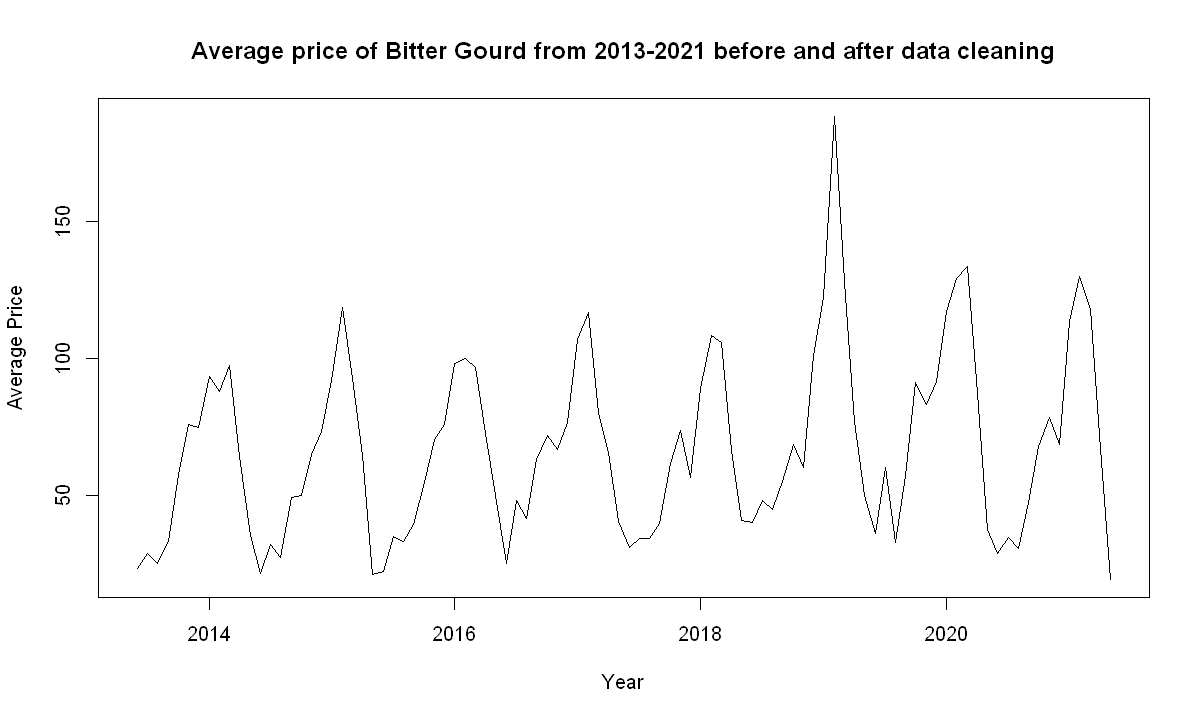

In [71]:
# Creating a time series
monthly_ts <- ts(monthly_data$MonthlyAverage, start=c(year(min(monthly_data$Month)), month(min(monthly_data$Month))), frequency=12)

# Plotting the time series
options(repr.plot.width=10, repr.plot.height=6)
plot(monthly_ts, type = "l", xlab = "Year", ylab = "Average Price", main= 'Average price of Bitter Gourd from 2013-2021 before and after data cleaning')


## 1.3. Handling Missing and Outlier Values

[1] 0

[1] 188.3333

$index
[1] 46

$replacements
[1] 108.4651

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2013,,,,,,23.13636,28.68000,25.16667,33.10000,57.70833,75.76087,75.00000
2014,93.64583,87.82609,97.38636,64.09091,35.32609,21.56000,31.95161,27.46667,49.16071,50.00000,64.88333,73.41667
2015,91.90000,118.54167,92.59259,64.44643,20.98333,22.30000,35.12903,33.06452,39.21667,54.87097,70.60345,76.09677
2016,98.22581,99.91071,96.72414,72.75000,50.00000,25.08333,48.32258,41.74194,63.08333,71.85484,66.83333,76.53226
2017,107.00000,116.75926,108.46511,65.83333,40.63333,30.93333,34.11290,34.43548,39.91379,61.50000,73.70690,56.45833
2018,89.23333,108.33333,105.86538,66.33333,40.88710,40.00000,48.30645,44.88710,55.08333,68.79032,60.33333,101.12903
2019,122.40741,120.00000,128.27586,76.91667,50.00000,36.16667,60.24194,32.66129,57.33333,91.12069,83.16667,91.69355
2020,117.17742,129.13793,133.75000,87.12500,37.70968,28.66667,34.74138,30.54839,47.58333,67.82258,78.53448,68.62903
2021,113.54839,129.90741,118.08333,67.08333,19.42308,,,,,,,


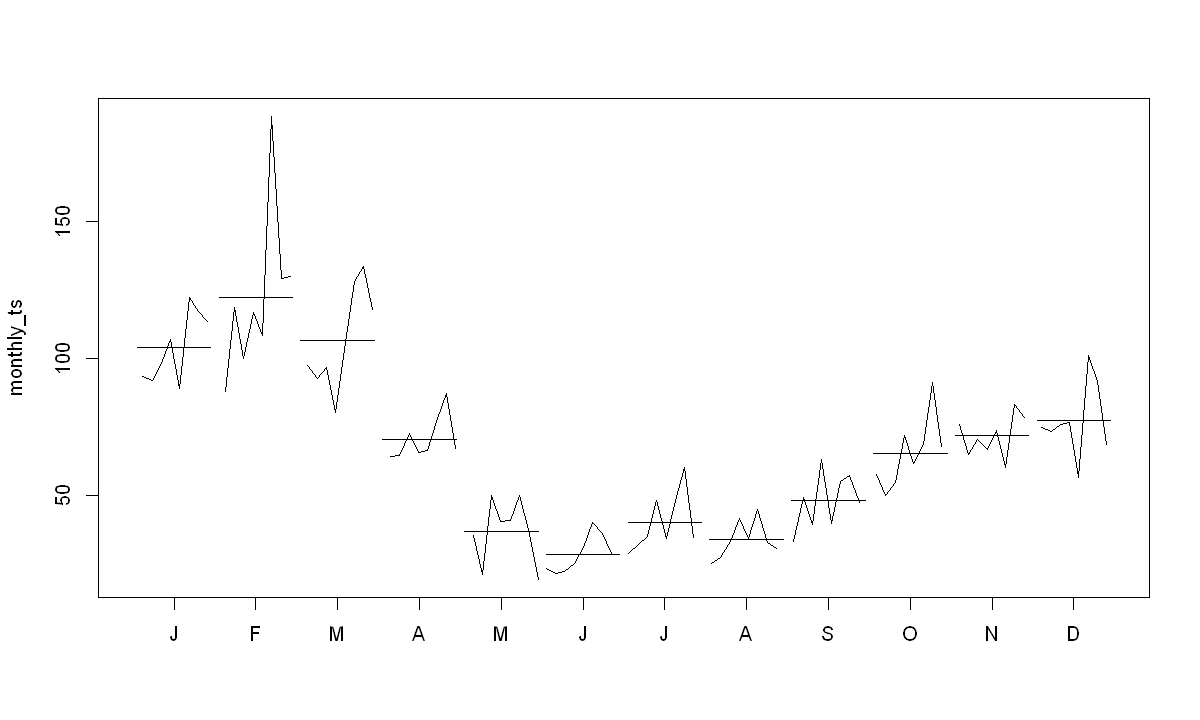

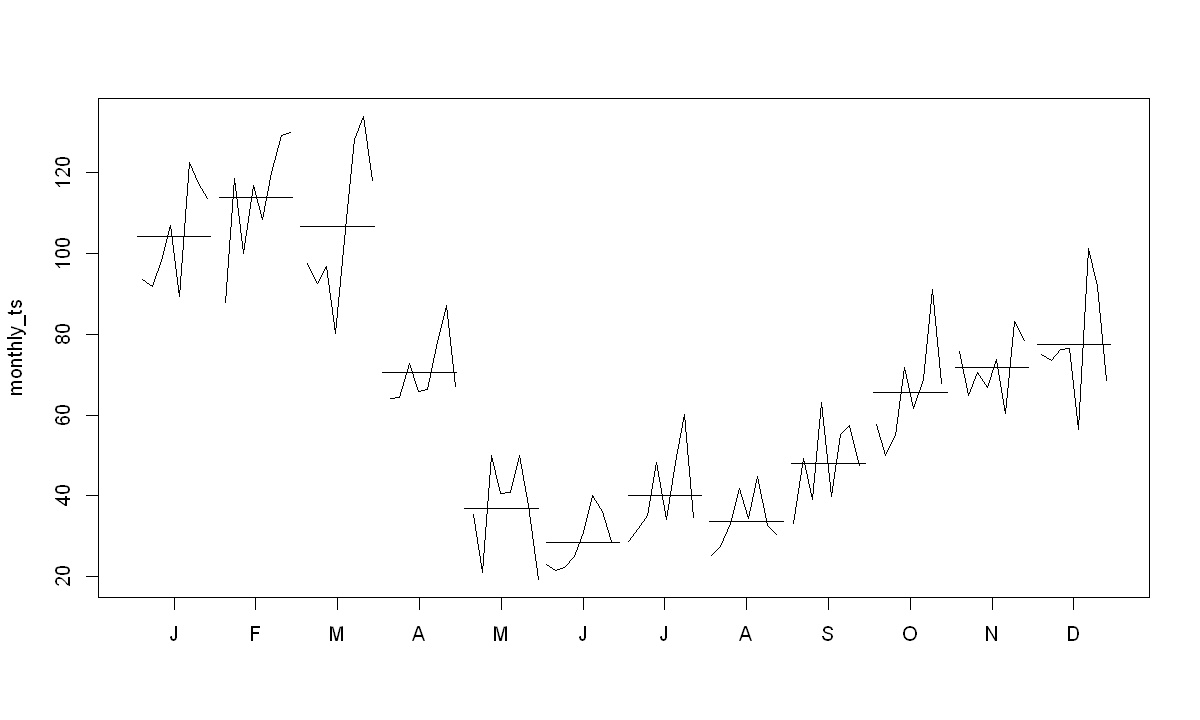

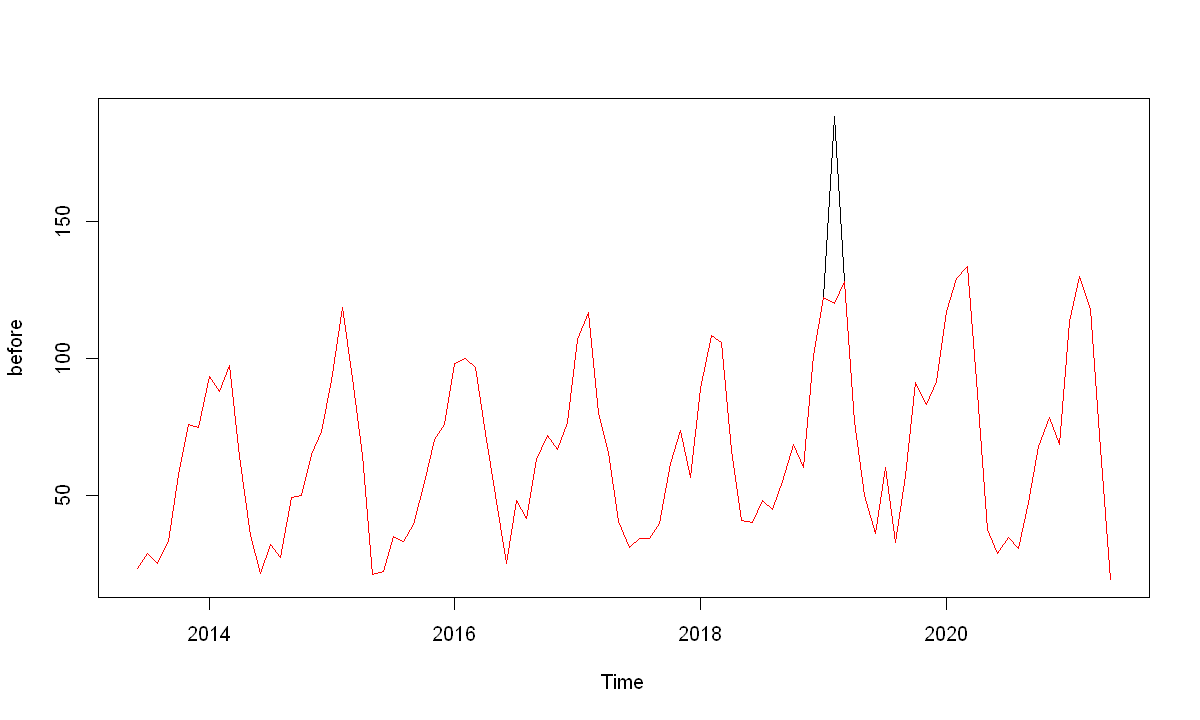

In [72]:
before <- monthly_ts
options(repr.plot.width=10, repr.plot.height=6)
# Handling missing values
sum(is.na(monthly_ts))

# Identifying and handling outliers
outliers <- boxplot(monthly_ts, plot = FALSE)$out
outliers
outlier_index <- which(monthly_ts %in% outliers)
monthplot(monthly_ts)
mean_F <- 120
monthly_ts[outlier_index] <- mean_F
forecast::tsoutliers(monthly_ts, iterate = 2, lambda = NULL)
forecast::tsclean(monthly_ts, replace.missing = TRUE, lambda = NULL)

# Re-plot after cleaning
monthplot(monthly_ts)
plot(before)
lines(monthly_ts, col = 'red')


## 1.4. Calendar adjustment

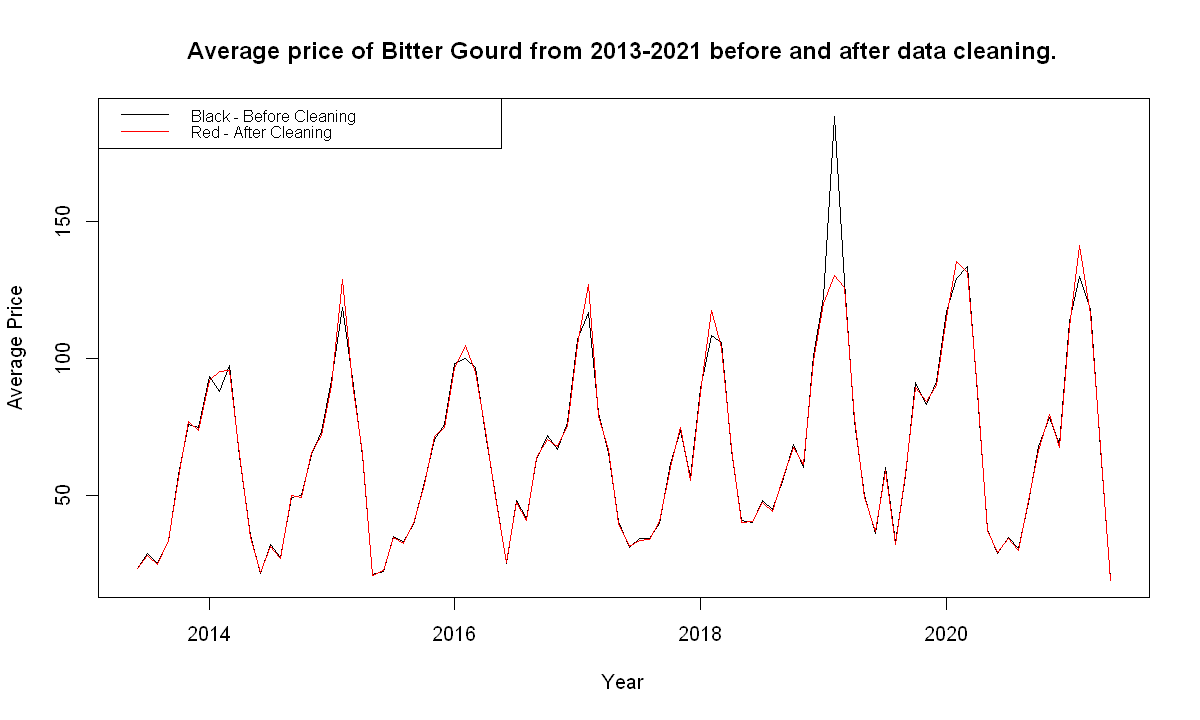

In [73]:
# Calendar adjustment
options(repr.plot.width=10, repr.plot.height=6)
average_days_per_month <- 365.25 / 12
days_in_month <- monthly_data %>% 
  mutate(Days = days_in_month(Month)) %>%
  .$Days 

monthly_ts <- monthly_ts / days_in_month * average_days_per_month

monthly_ts <- ts(monthly_ts, start=start(monthly_ts), frequency=frequency(monthly_ts))

# Plot after calendar adjustment
plot(before, type = "l", xlab = "Year", ylab = "Average Price", main= 'Average price of Bitter Gourd from 2013-2021 before and after data cleaning.')
lines(monthly_ts, col = 'red')
legend("topleft", legend = c("Black - Before Cleaning", "Red - After Cleaning"), col = c("black", "red"), lty = 1, cex = 0.8)


## 1.5. Creating Training and Test Set
Next, a training set (data up to March 2020) and a test set (from April 2020 to May 2021) were created.


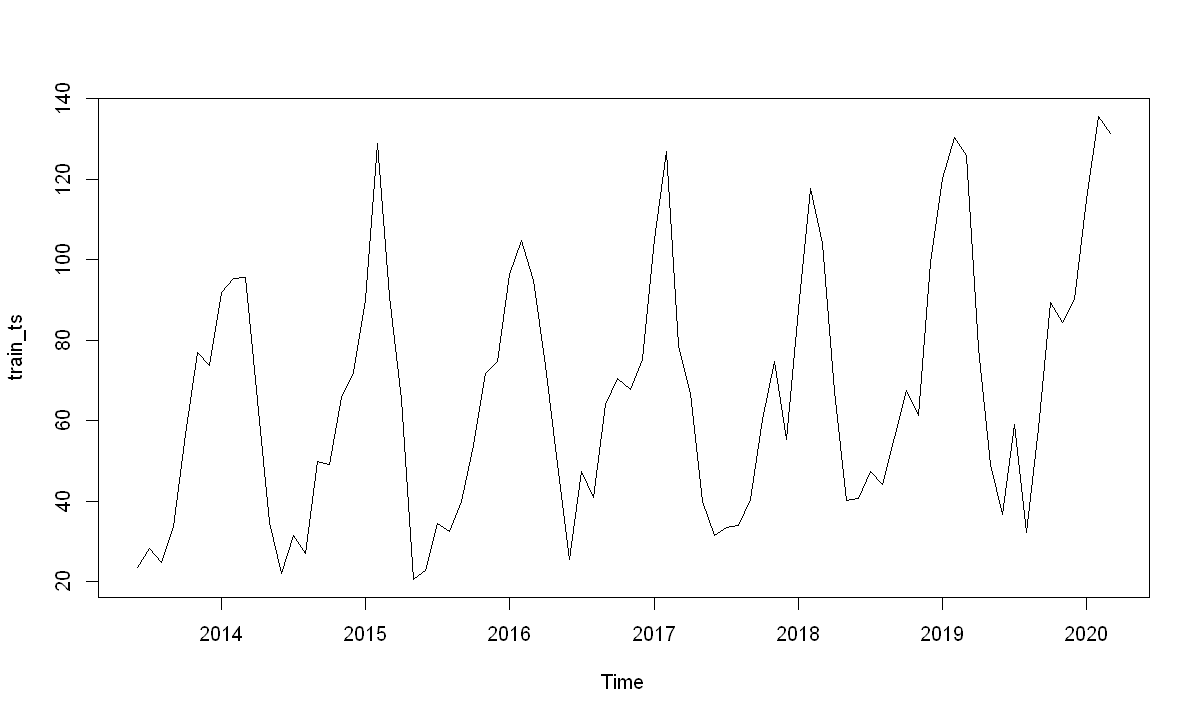

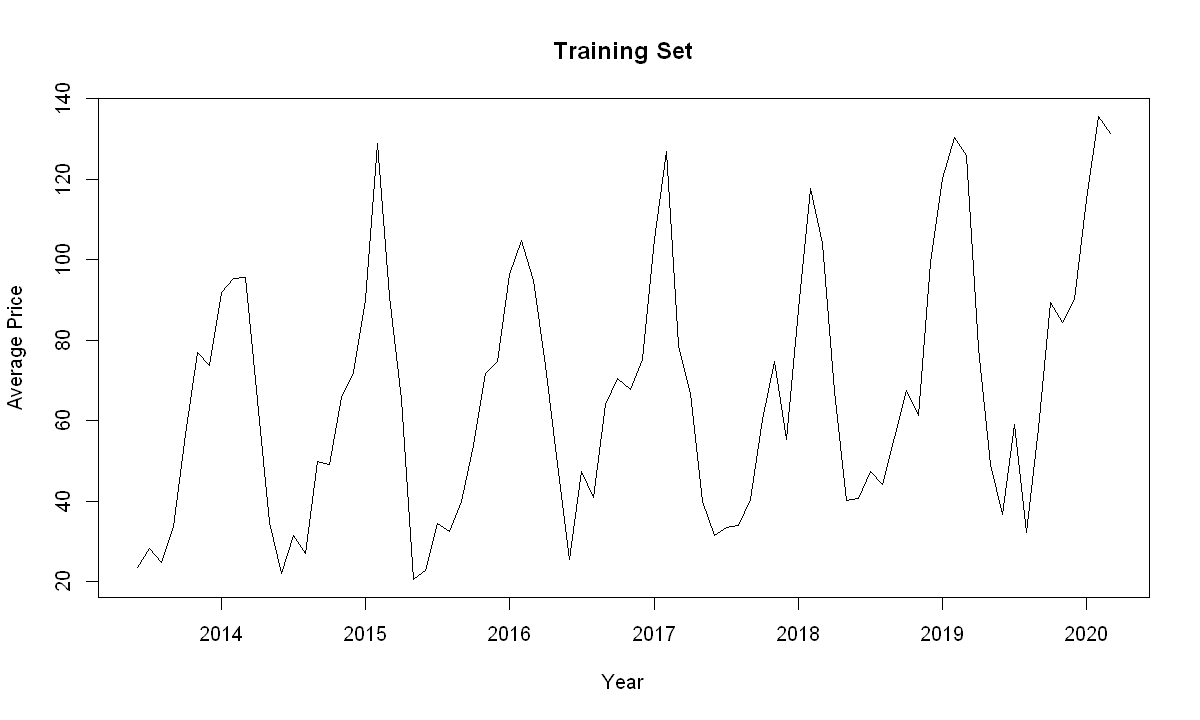

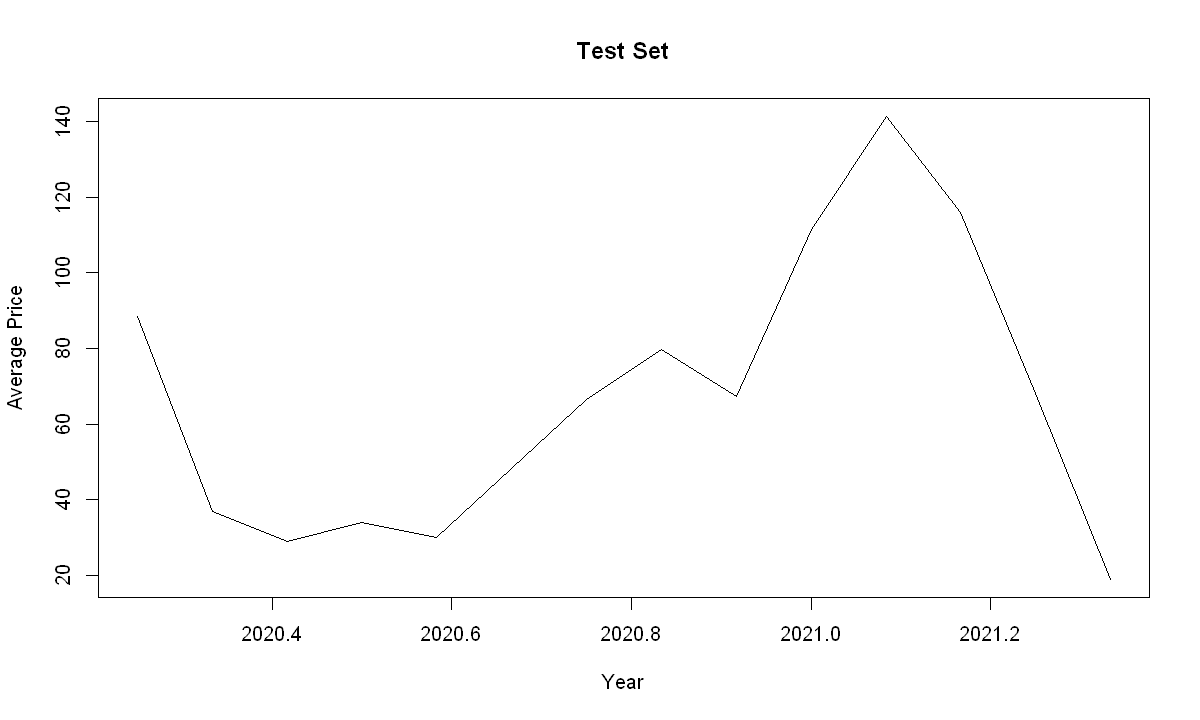

In [74]:
# Creating training set
options(repr.plot.width=10, repr.plot.height=6)
train_ts <- window(monthly_ts, end=c(2020, 3))
plot(train_ts)

# Creating test set
test_ts <- window(monthly_ts, start=c(2020, 4))
plot(train_ts, type = "l", xlab = "Year", ylab = "Average Price", main= 'Training Set')
plot(test_ts, type = "l", xlab = "Year", ylab = "Average Price", main= 'Test Set')
length_train <- length(train_ts)
length_test <- length(test_ts)


# 2. Seasonal and Trend Analysis

## 2.1. Basic plot

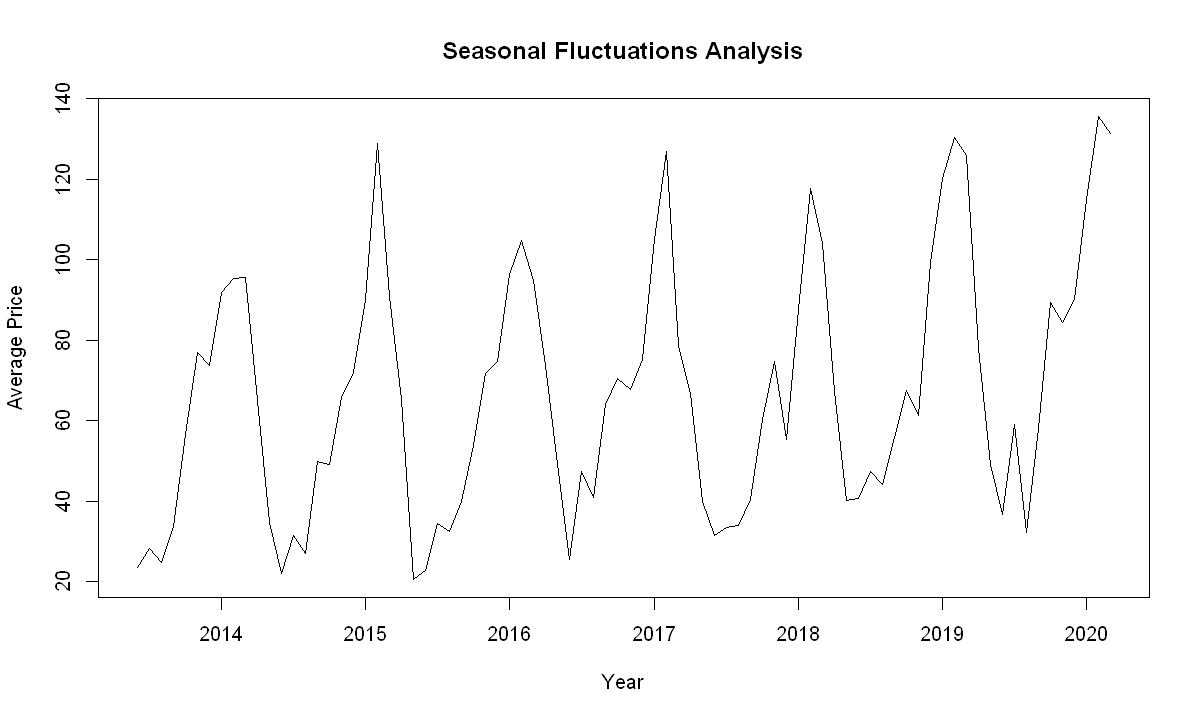

In [75]:
# Seasonality and trend analysis
options(repr.plot.width=10, repr.plot.height=6)
plot(train_ts, type = "l", xlab = "Year", ylab = "Average Price", main= 'Seasonal Fluctuations Analysis')


The plot clearly shows seasonality in the data. Each year, recurring patterns are observed—prices rise and fall at regular intervals, indicating seasonal price variability. Additionally, there is an upward trend, with average prices consistently increasing, except for the years 2016 and 2018.


## 2.2. Monthplot

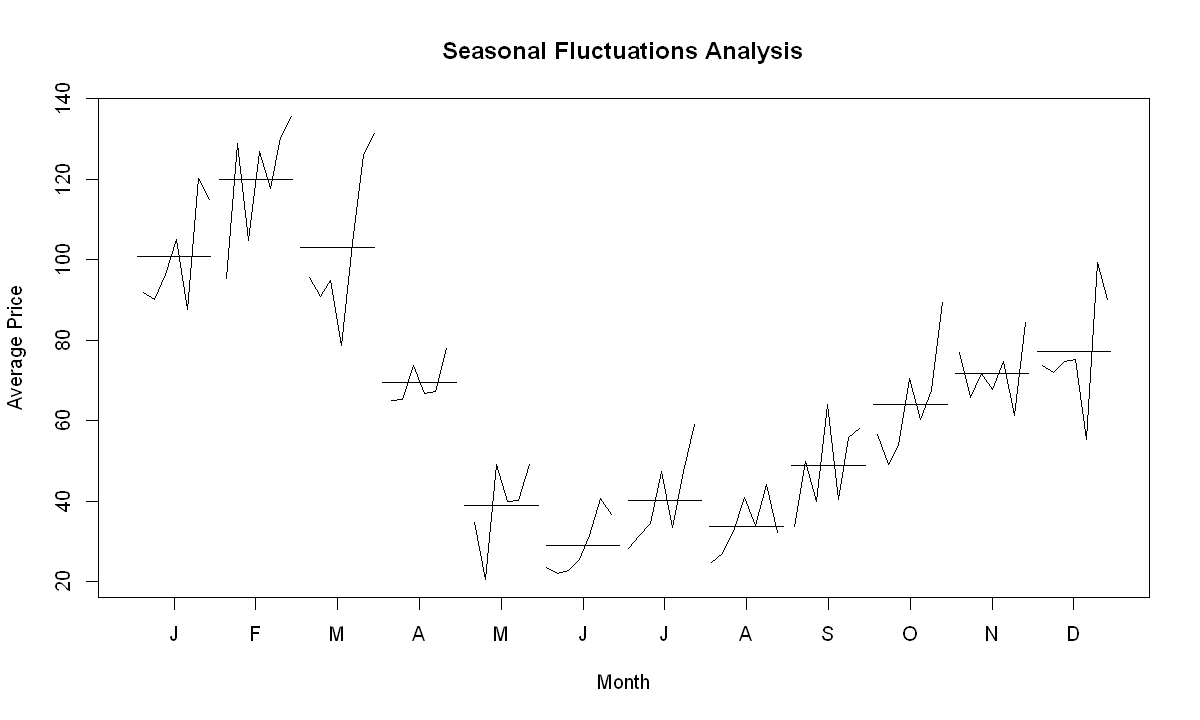

In [76]:
monthplot(train_ts, xlab = "Month", ylab = "Average Price", main= 'Seasonal Fluctuations Analysis')


The monthplot chart illustrates price fluctuations for each month across different years. Notably large fluctuations can be observed in March. The period from December to March appears to be the least stable throughout the year.


## 2.3. Seasonplot

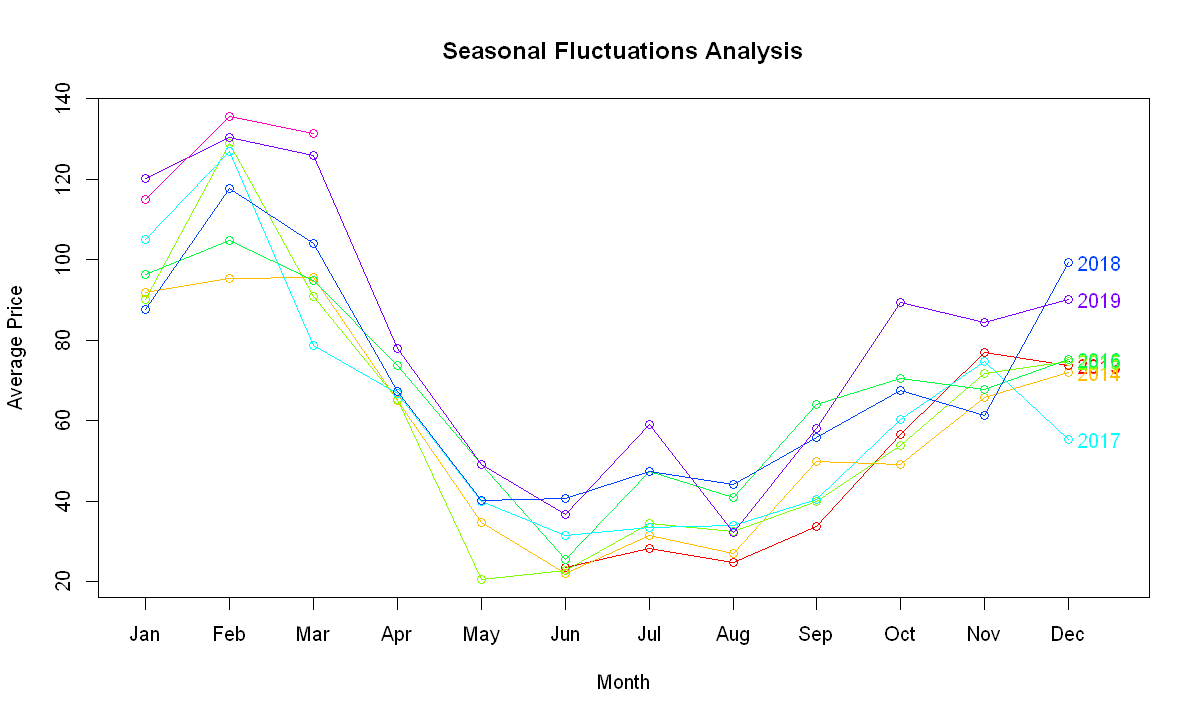

In [77]:
seasonplot(train_ts, year.labels = T, col = rainbow(8), xlab = "Month", ylab = "Average Price", main= 'Seasonal Fluctuations Analysis')


The seasonplot shows a clear decline in the average price across all years, beginning around February and March and continuing until May. Prices rise again in September. The year 2019 had the highest average price, while 2014 and 2015 were the years with the lowest average prices throughout the year.


# 3. Autocorrelation Analysis

## 3.1. Lagplot

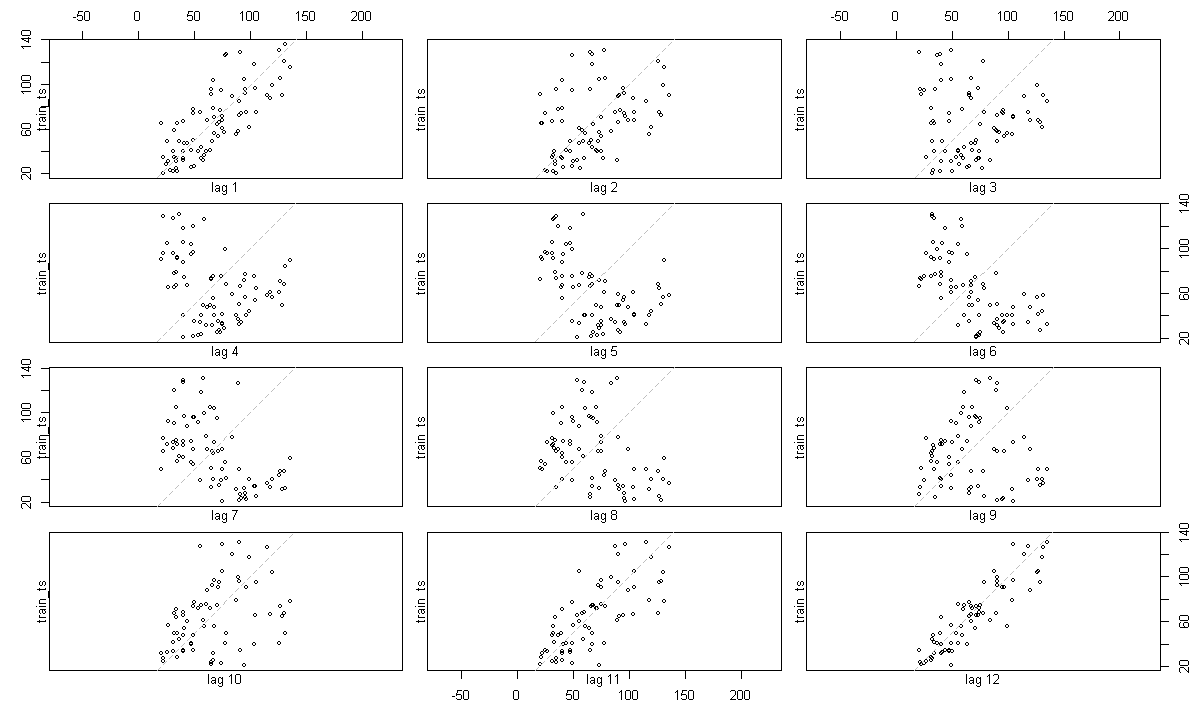

In [78]:
# Autocorrelation analysis

lag.plot(train_ts, lags = 12, do.lines = F)

A series of plots was created using the `lag.plot` function. Each plot represents the relationship between the time series values and the values lagged by a specific number of time steps (lags from 1 to 12), where:
- The X-axis shows the time series values at a given time point (t).
- The Y-axis shows the time series values lagged by the number of periods corresponding to the lag number (t - lag).

**Lags 1-3**: There is a clear positive correlation between the series values and their immediate lags, indicating strong short-term autocorrelation.

**Lags 4-6**: The correlation is still visible, but it appears to weaken as the number of lags increases.

**Lags 7-12**: For higher lags, the correlation becomes weaker, but for some (e.g., lag 12), a stronger correlation reappears, which may suggest annual seasonality.

These patterns are typical for data exhibiting seasonality and/or cyclicality.


## 3.2. The autocorrelation function (Acf) plot

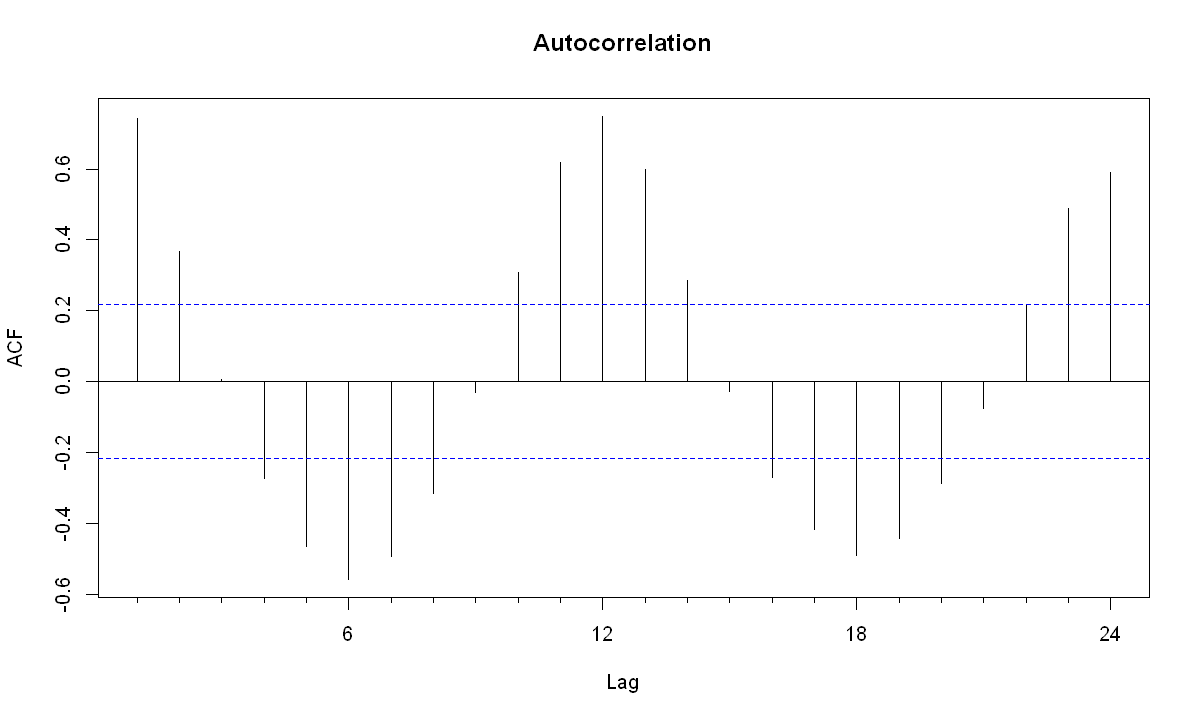

In [79]:
Acf(train_ts, main = 'Autocorrelation')

The autocorrelation function (Acf) plot indicates a strong positive autocorrelation in the short term (bars exceed the significance threshold for lags 1 and 2). The bar for lag 12 suggests potential annual seasonality in the data, as it is another bar that exceeds the significance threshold, indicating that values from a given month may be similar to values from the same month in the previous year.


## 3.3. The Partial Autocorrelation Function (PACF)  plot

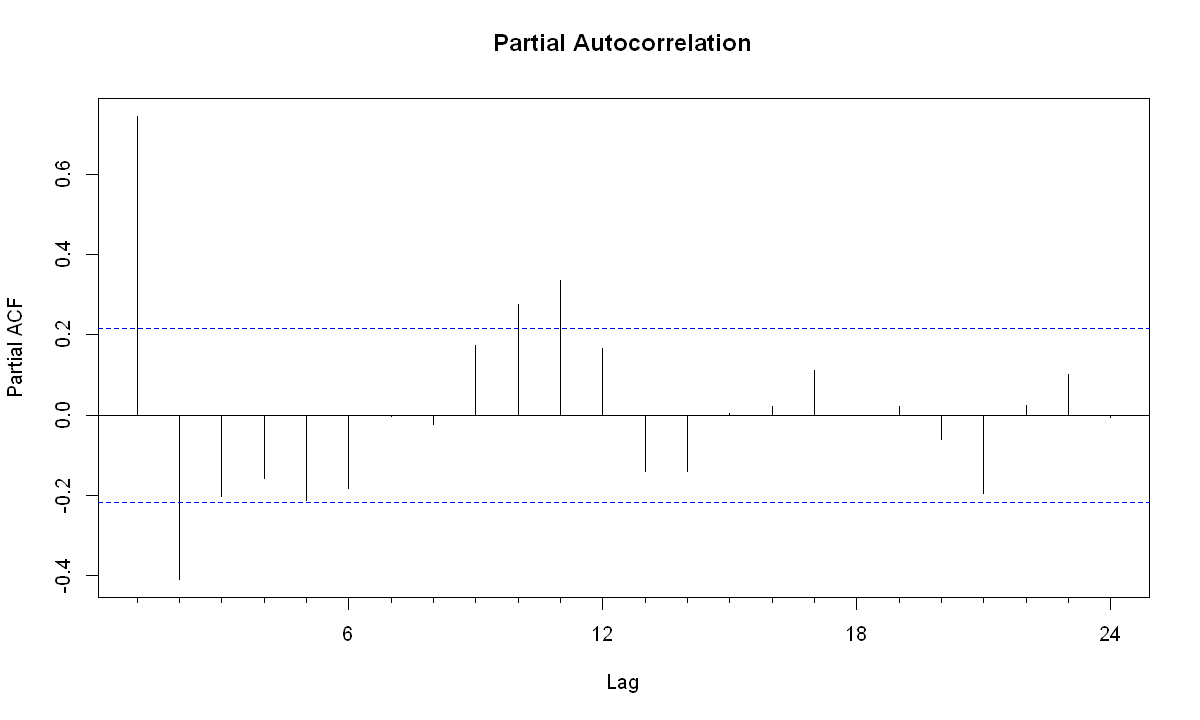

In [80]:
Pacf(train_ts, main = 'Partial Autocorrelation')

The Partial Autocorrelation Function (PACF) measures the correlation between values in a time series and their lags after accounting for the influence of intermediate values. Unlike the ACF, which measures the total correlation, PACF indicates the direct relationship between an observation and its lag. Observations from the plot:

- There are no significant bars exceeding the threshold, with perhaps one or two exceptions, suggesting that most of the autocorrelation in the data can be explained by short lags.
- Negative PACF values indicate a change in the direction of the relationship compared to previous values.
- Overall, this plot may suggest that the time series does not exhibit strong long-term autocorrelation.


In summary, the Acf and Pacf plots reveal an upward trend (high values at lag 1). The Acf plot shows high values at lag 12, indicating seasonality, while the low values at lag 12 in the Pacf plot suggest that seasonality may not be as strongly present.


# 4. Differencing 
The next step was to remove seasonality and the linear trend. Differencing was applied with a lag of 12, followed by a lag of 1.


## 4.1. First Differencing

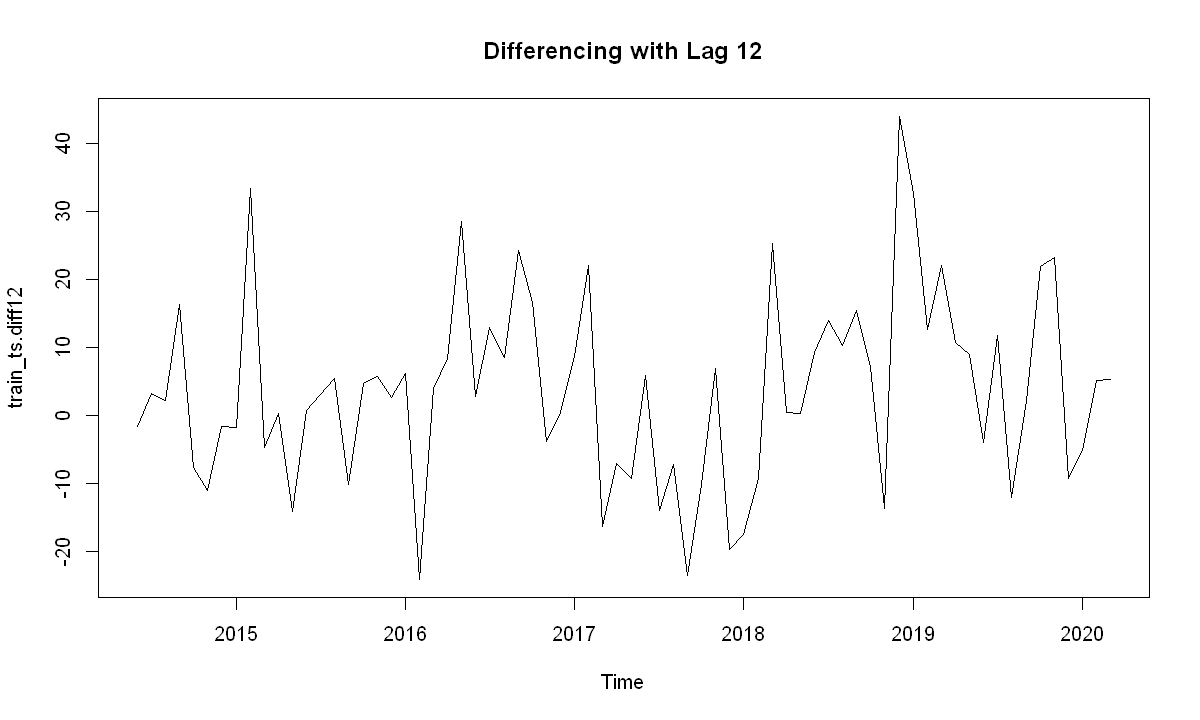

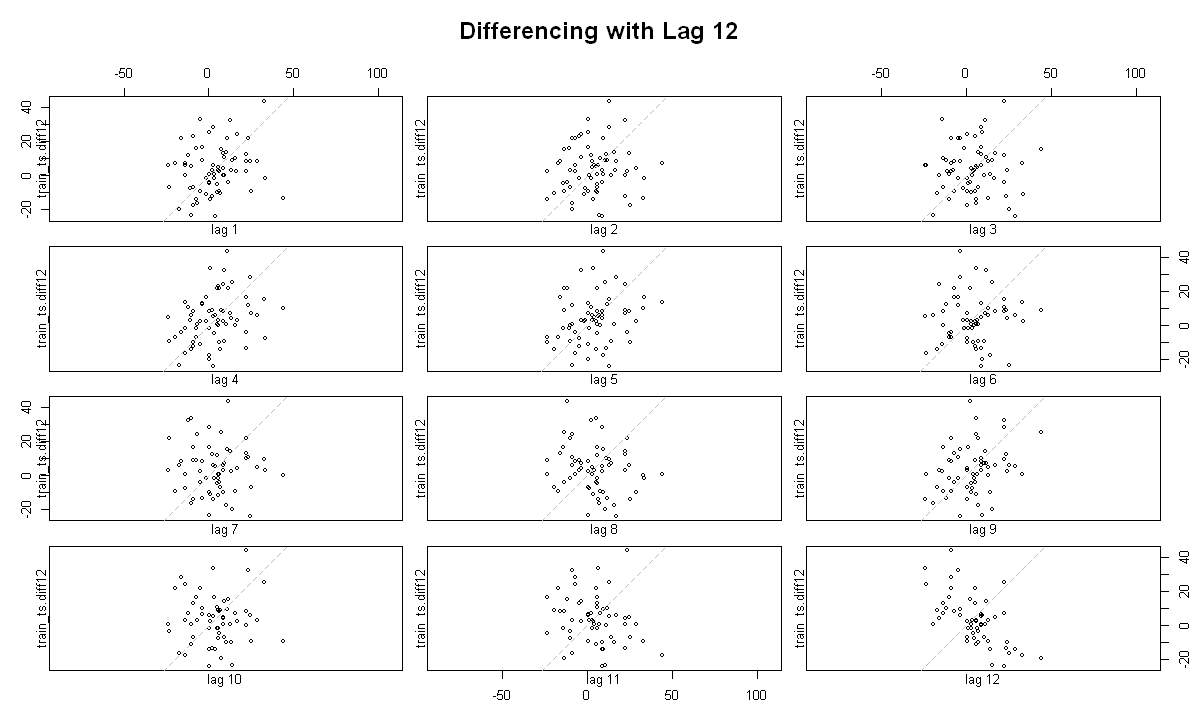

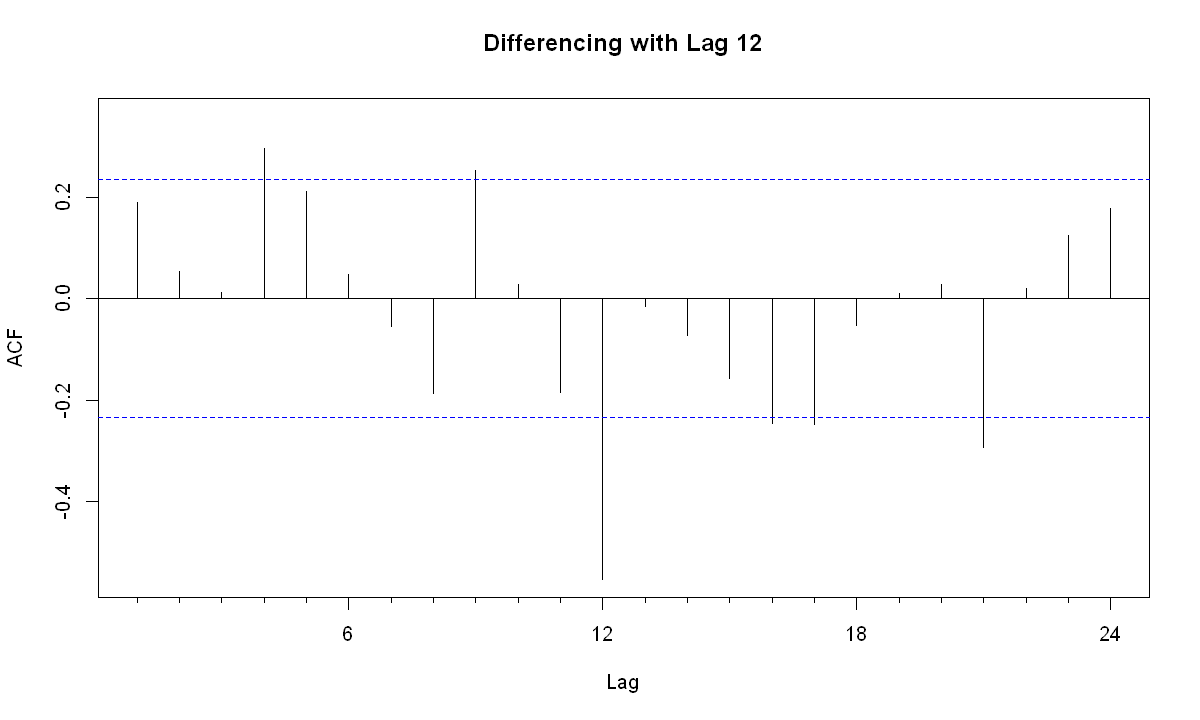

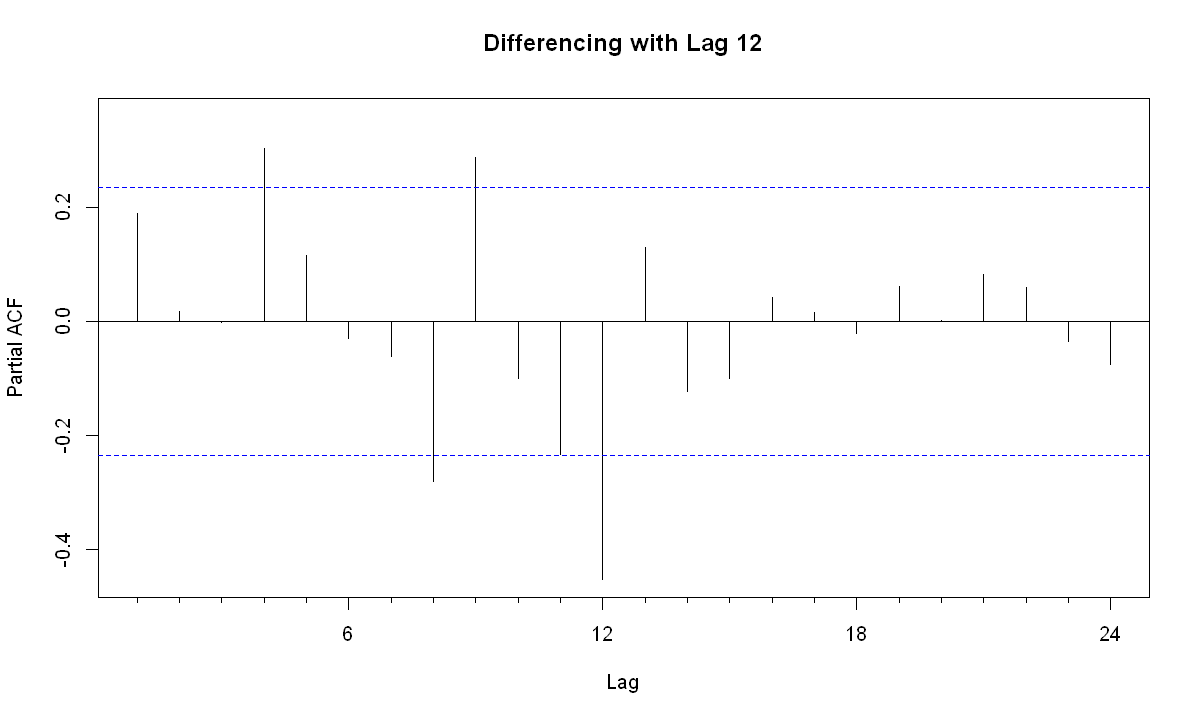

In [81]:
# Differencing with lag 12
options(repr.plot.width=10, repr.plot.height=6)
train_ts.diff12 <- diff(train_ts, lag= 12)
plot(train_ts.diff12, main = 'Differencing with Lag 12')
lag.plot(train_ts.diff12, lags = 12, do.lines = F, main = 'Differencing with Lag 12')
Acf(train_ts.diff12, main = 'Differencing with Lag 12')
Pacf(train_ts.diff12, main = 'Differencing with Lag 12')


The plots suggest that seasonal differencing with a 12-month lag was effective in removing seasonality and the trend from the time series. However, as seen in the lag.plot, the points are not entirely randomly distributed.


## 4.1. Second Differencing

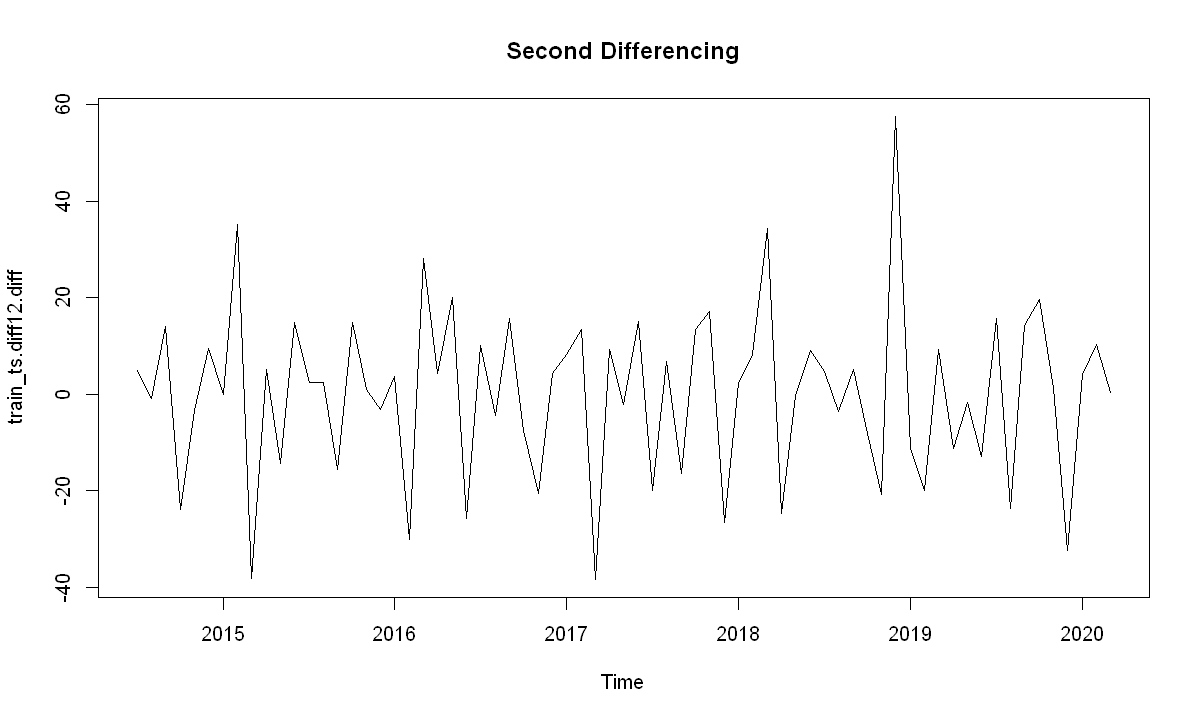

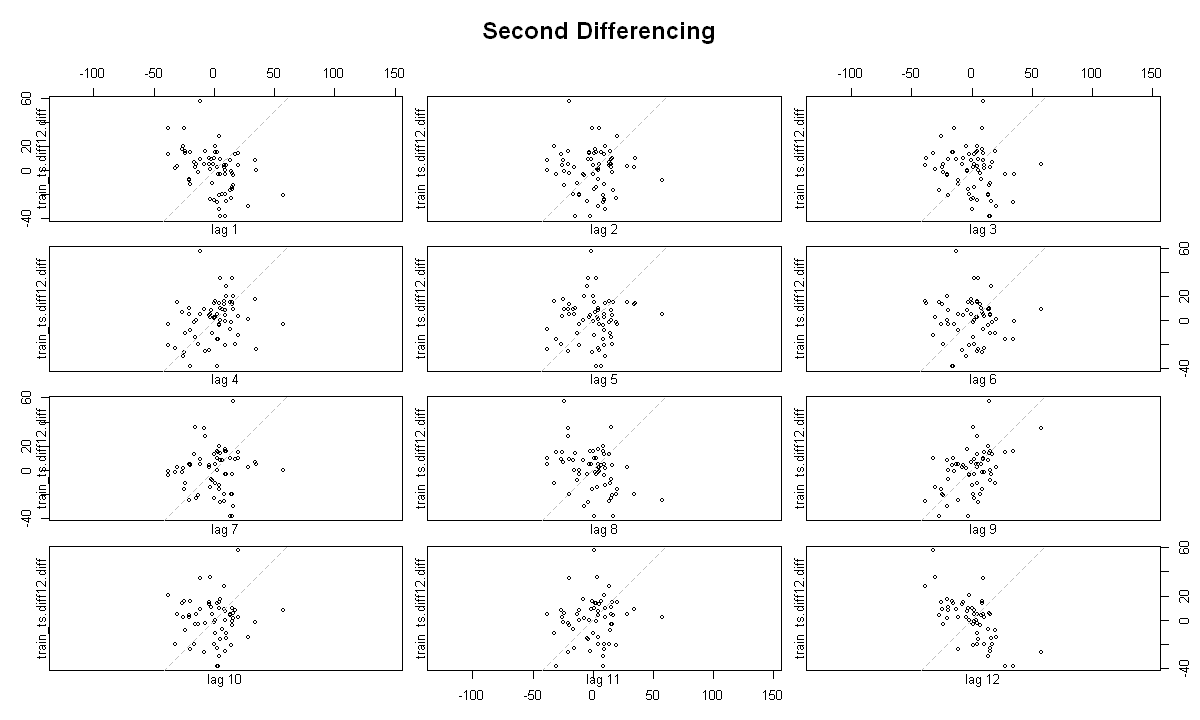

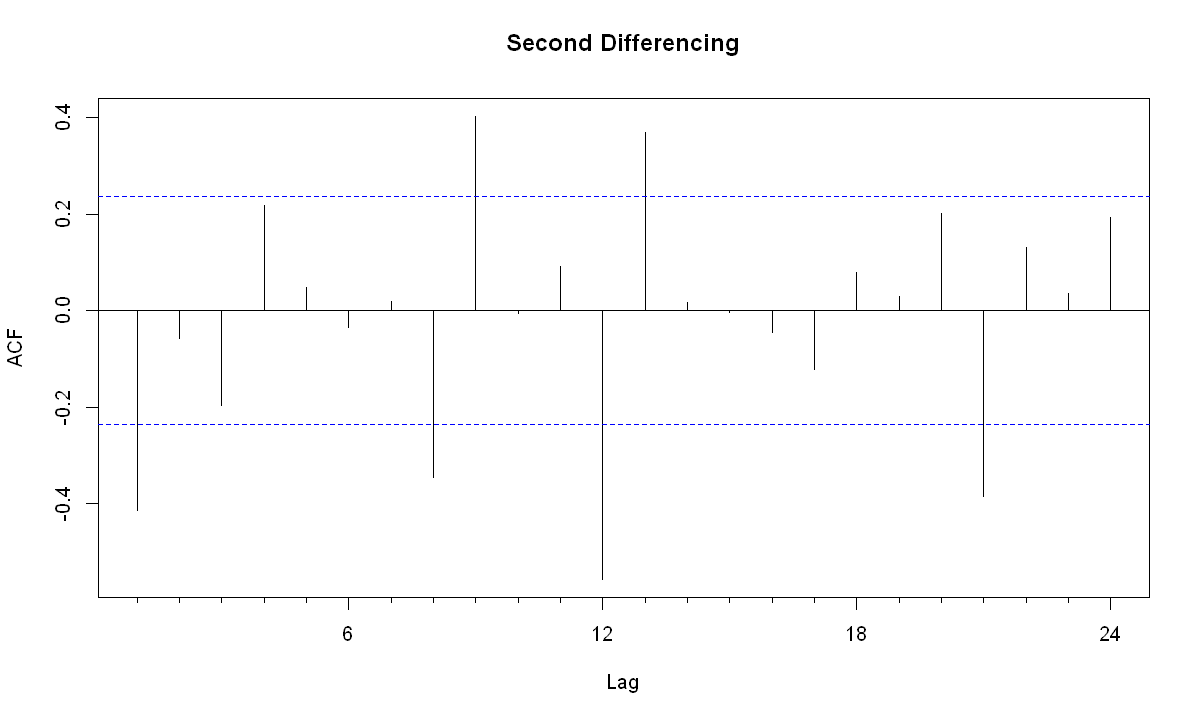

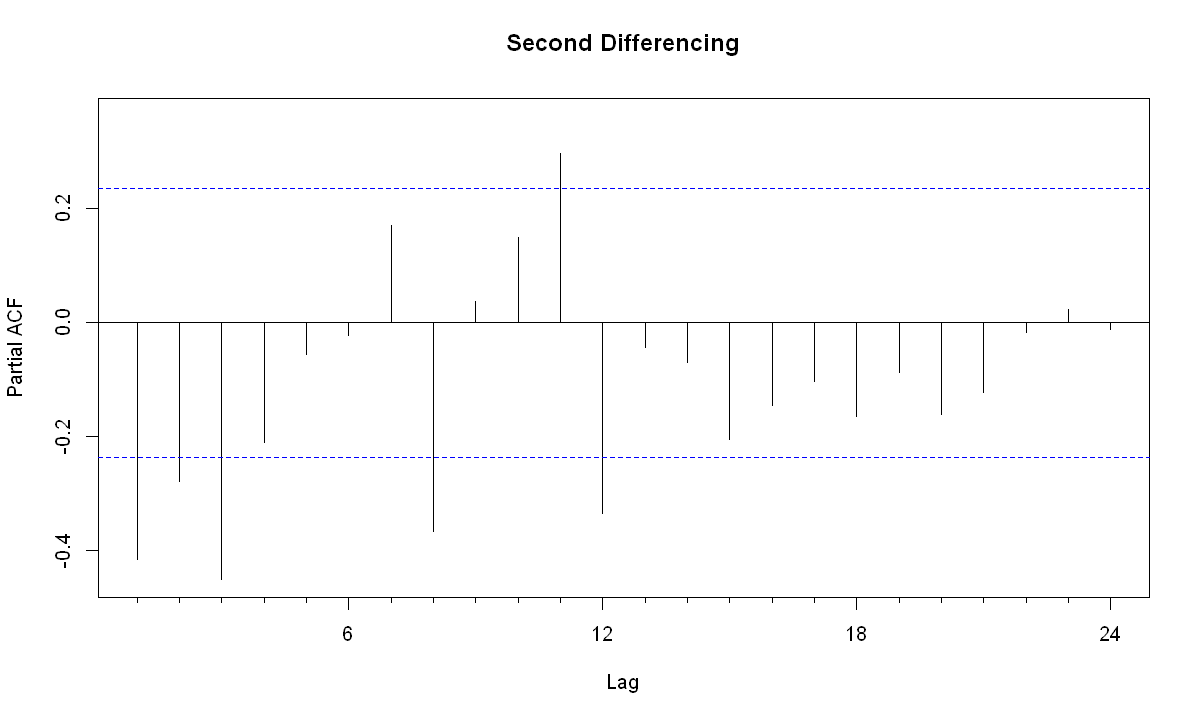

In [82]:
# Second differencing
options(repr.plot.width=10, repr.plot.height=6)
train_ts.diff12.diff <- diff(train_ts.diff12)
plot(train_ts.diff12.diff, main = 'Second Differencing')
lag.plot(train_ts.diff12.diff, lags = 12, do.lines = F, main = 'Second Differencing')
Acf(train_ts.diff12.diff, main = 'Second Differencing')
Pacf(train_ts.diff12.diff, main = 'Second Differencing')


## Additive Model
After seasonal differencing with a 12-month lag, the seasonal fluctuations were effectively removed. This indicates that the seasonal components were regular and did not change proportionally with the time series values, which is typical for an additive model.

An additive model is appropriate when the seasonal effects and trends are constant over time and are not dependent on the level of the series. This means that components such as trend, seasonality, and irregularities can be summed to obtain the expected values of the time series.


__Model Form:__

$$
y_{Tij} = f(T_{ij}) + g_j \quad \text{for} \quad i = n+1, n+2, \ldots
$$

\begin{align*}
\text{where:} \\
&\bullet \ \ y_{Tij} \text{ - the predicted value of the time series at time } i \\
&\bullet \ \ f(T_i) \text{ - the trend function over time } i \\
&\bullet \ \ g_j \text{ - the seasonal component corresponding to period } j \\
\end{align*}


# 5. Building Models for Differenced Data

## 5.1. MA(12) Model for Differenced Data

Series: train_ts.diff12.diff 
ARIMA(0,1,12)(0,1,0)[12] 

Coefficients:
          ma1     ma2      ma3     ma4     ma5      ma6     ma7      ma8
      -1.8341  1.0869  -0.4218  0.1817  0.3818  -0.9900  1.1484  -1.1273
s.e.   0.2243  0.5459   0.7109  0.7799  0.8072   0.7253  0.5893   0.4508
         ma9     ma10     ma11    ma12
      1.2858  -0.7411  -0.6002  0.6449
s.e.  0.3780   0.3633   0.3452  0.1782

sigma^2 = 360.9:  log likelihood = -250.13
AIC=526.26   AICc=534.92   BIC=552.59

Training set error measures:
                     ME     RMSE      MAE      MPE     MAPE      MASE
Training set -0.1715942 15.16955 11.00162 154.3283 236.3277 0.4452228
                    ACF1
Training set -0.03586519

Series: train_ts.diff12.diff 
ARIMA(0,1,12)(0,1,0)[12] 

Coefficients:
          ma1     ma2  ma3  ma4  ma5  ma6  ma7      ma8     ma9     ma10  ma11
      -1.6702  0.6971    0    0    0    0    0  -0.6269  1.8536  -1.7458     0
s.e.   0.1435  0.1489    0    0    0    0    0   0.2217  0.4851   0.3994     0
        ma12
      0.5072
s.e.  0.1221

sigma^2 = 265.2:  log likelihood = -251.55
AIC=517.09   AICc=519.42   BIC=531.27

Training set error measures:
                     ME     RMSE      MAE      MPE     MAPE      MASE
Training set -0.4565946 13.86148 9.670049 128.9639 167.9138 0.3913355
                   ACF1
Training set -0.1087685

Warning message in predict.Arima(object, n.ahead = h):
"część średniej kroczącej modelu nie jest odwracalna"


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2020,,,,-13.57315916,11.65538482,-16.77566072,11.87960464,19.54556334,-34.21755193,22.44676932,10.68189030,-23.42990744
2021,3.36742444,7.60973336,-0.00377497,,,,,,,,,


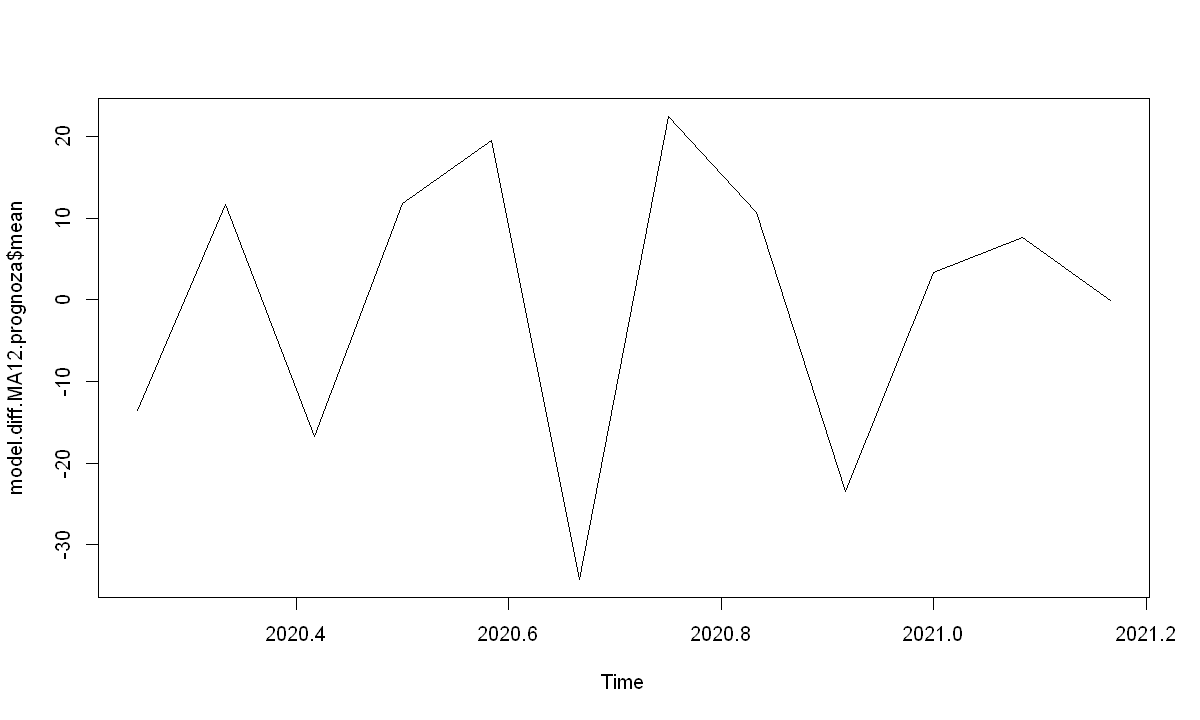

ME        MAE        MPE       MAPE       RMSE 
 -9.083327  18.784313 -20.204604  38.560913  22.768903

ERROR: Error in UseMethod("logLik"): niestosowalna metoda dla 'logLik' zastosowana do obiektu klasy "ts"


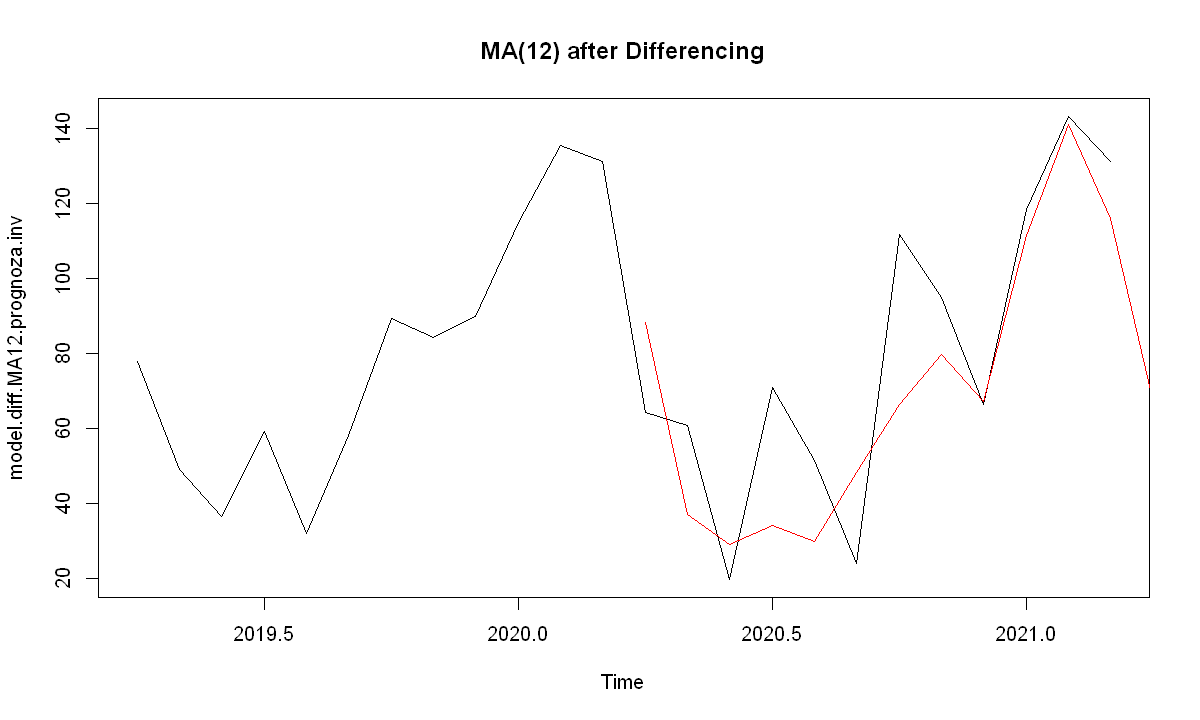

In [83]:
# MA(12) model for differenced data
model.diff.MA12 <- Arima(y = train_ts.diff12.diff, order = c(0,1,12), seasonal = c(0,1,0))
summary(model.diff.MA12)
coefs <- model.diff.MA12$coef
coef.sd <- sqrt(diag(model.diff.MA12$var.coef))
ind <- abs(coefs/(1.96 * coef.sd))
signif <- which(ind >= 1)

# Building model with significant coefficients
temp.fixed <- numeric(12)
temp.fixed[signif] <- NA
model.diff.MA12.signif <- Arima(y = train_ts.diff12.diff, order = c(0,1,12), seasonal = c(0,1,0), fixed = temp.fixed)
summary(model.diff.MA12.signif)

# Forecasting with the model
model.diff.MA12.prognoza <- forecast(model.diff.MA12.signif, h = 12)
model.diff.MA12.prognoza$mean
ts.plot(model.diff.MA12.prognoza$mean)

# Inverting the differencing
xi_values_for_diff12 <- tail(train_ts, 12)
model.diff.MA12.prognoza.inv <- diffinv(model.diff.MA12.prognoza$mean, differences=1, lag=12, xi=xi_values_for_diff12)
plot(model.diff.MA12.prognoza.inv, main = 'MA(12) after Differencing')
lines(test_ts, col = 'red')
accuracy(model.diff.MA12.prognoza.inv, test_ts)[, c('ME', 'MAE', 'MPE', 'MAPE', 'RMSE')]
AIC(model.diff.MA12.prognoza.inv)


## 5.2. MA(1) Model for Differenced Data

Series: train_ts.diff12.diff 
ARIMA(0,1,1)(0,1,0)[12] 

Coefficients:
          ma1
      -1.0000
s.e.   0.0447

sigma^2 = 1085:  log likelihood = -276.67
AIC=557.34   AICc=557.57   BIC=561.39

Training set error measures:
                     ME     RMSE      MAE      MPE     MAPE     MASE       ACF1
Training set -0.1194515 29.40454 20.37801 104.6214 236.6801 0.824674 -0.4110104

Series: train_ts.diff12.diff 
ARIMA(0,1,1)(0,1,0)[12] 

Coefficients:
          ma1
      -1.0000
s.e.   0.0447

sigma^2 = 1085:  log likelihood = -276.67
AIC=557.34   AICc=557.57   BIC=561.39

Training set error measures:
                     ME     RMSE      MAE      MPE     MAPE     MASE       ACF1
Training set -0.1194515 29.40454 20.37801 104.6214 236.6801 0.824674 -0.4110104

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2020,,,,-11.59912938,-2.12309275,-13.16975150,15.27518144,-24.05584707,13.95381246,19.30939920,0.90817322,-32.76356220
2021,3.79621916,9.89485793,-0.05089456,,,,,,,,,


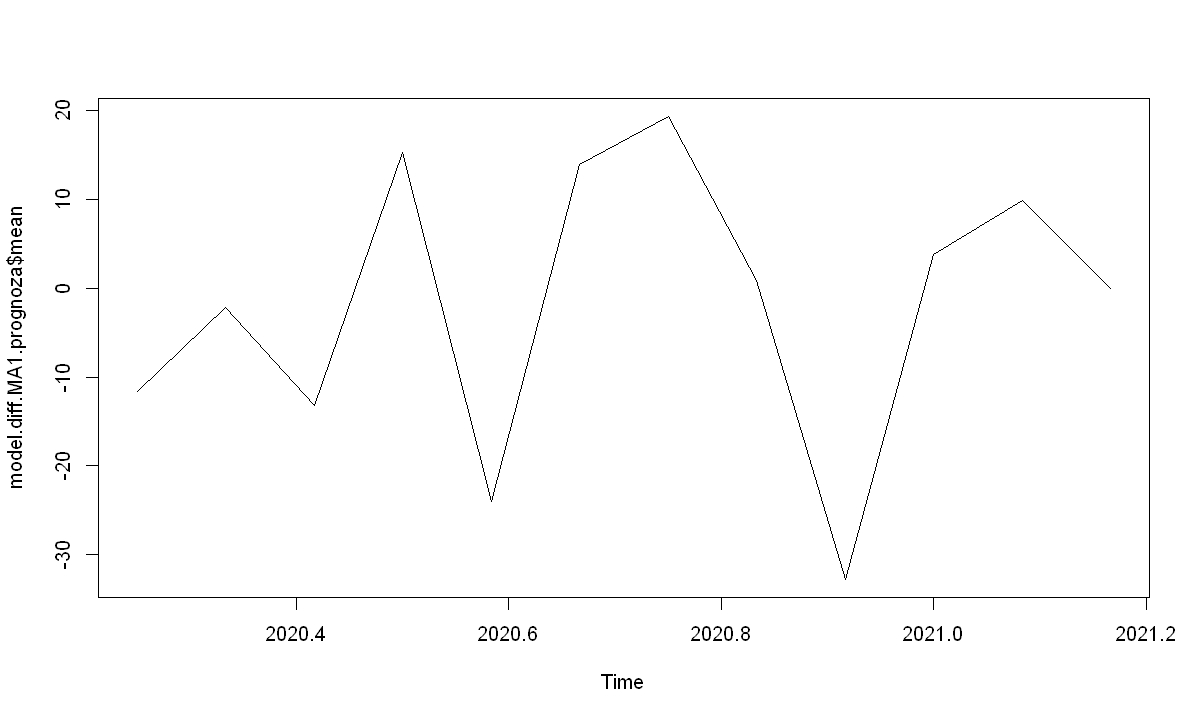

ME        MAE        MPE       MAPE       RMSE 
 -7.432415  17.368340 -12.947861  34.990664  21.426632

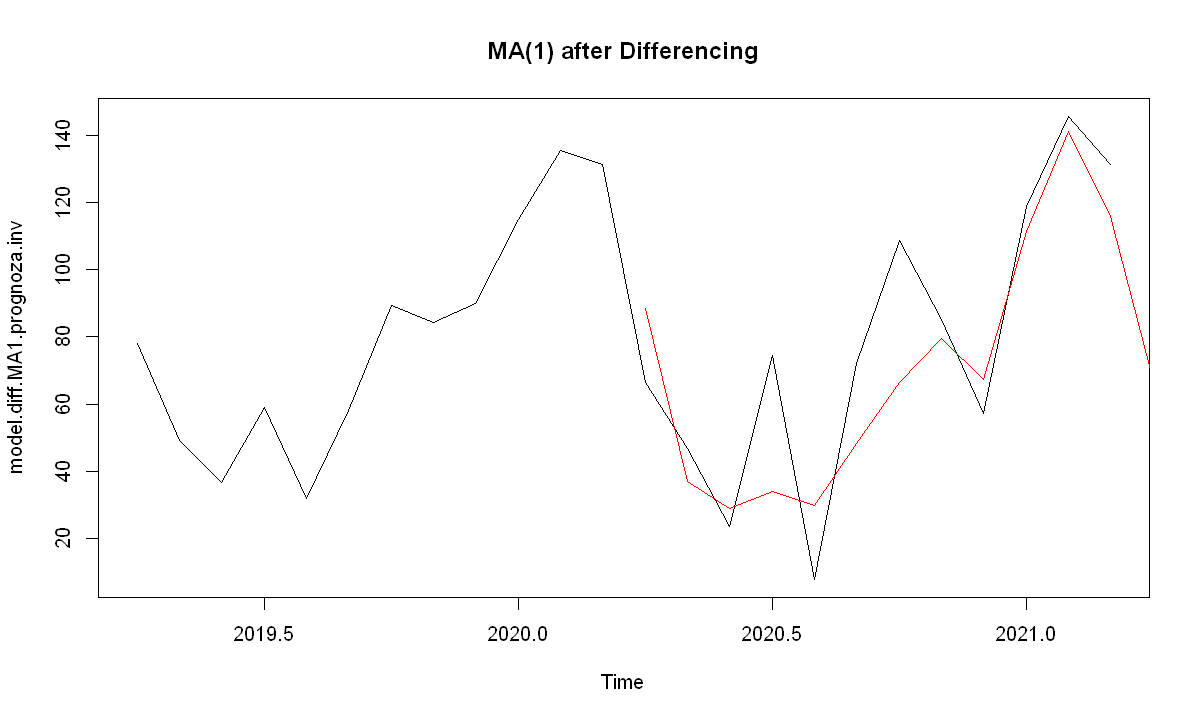

In [84]:
# MA(1) model for differenced data
model.diff.MA1 <- Arima(train_ts.diff12.diff, order=c(0,1,1), seasonal = c(0,1,0))
summary(model.diff.MA1)
coefs <- model.diff.MA1$coef
coef.sd <- sqrt(diag(model.diff.MA1$var.coef))
ind <- abs(coefs/(1.96 * coef.sd))
signif <- which(ind >= 1)

# Building model with significant coefficients
temp.fixed <- numeric(1)
temp.fixed[signif] <- NA
model.diff.MA1.signif <- Arima(y = train_ts.diff12.diff, order = c(0,1,1), seasonal = c(0,1,0), fixed = temp.fixed)
summary(model.diff.MA1.signif)

# Forecasting with the model
model.diff.MA1.prognoza <- forecast(model.diff.MA1.signif, h = 12)
model.diff.MA1.prognoza$mean
ts.plot(model.diff.MA1.prognoza$mean)

# Inverting the differencing
xi_values_for_diff12 <- tail(train_ts, 12)
model.diff.MA1.prognoza.inv <- diffinv(model.diff.MA1.prognoza$mean, differences=1, lag=12, xi=xi_values_for_diff12)
plot(model.diff.MA1.prognoza.inv, main = 'MA(1) after Differencing')
lines(test_ts, col = 'red')
accuracy(model.diff.MA1.prognoza.inv, test_ts)[, c('ME', 'MAE', 'MPE', 'MAPE', 'RMSE')]


## 5.3. AR(1) Model for Differenced Data

Series: train_ts.diff12.diff 
ARIMA(1,1,0)(0,1,0)[12] 

Coefficients:
          ar1
      -0.6194
s.e.   0.1026

sigma^2 = 1858:  log likelihood = -289.96
AIC=583.92   AICc=584.15   BIC=587.98

Training set error measures:
                    ME     RMSE      MAE      MPE     MAPE     MASE       ACF1
Training set 0.1783773 38.48474 26.90171 172.5323 564.9831 1.088681 -0.2141859

Series: train_ts.diff12.diff 
ARIMA(1,1,0)(0,1,0)[12] 

Coefficients:
          ar1
      -0.6194
s.e.   0.1026

sigma^2 = 1858:  log likelihood = -289.96
AIC=583.92   AICc=584.15   BIC=587.98

Training set error measures:
                    ME     RMSE      MAE      MPE     MAPE     MASE       ACF1
Training set 0.1783773 38.48474 26.90171 172.5323 564.9831 1.088681 -0.2141859

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2020,,,,3.946787,-1.598193,-3.341412,19.341328,-16.420819,19.378413,26.103053,6.853888,-26.292667
2021,9.941838,16.241941,6.171409,,,,,,,,,


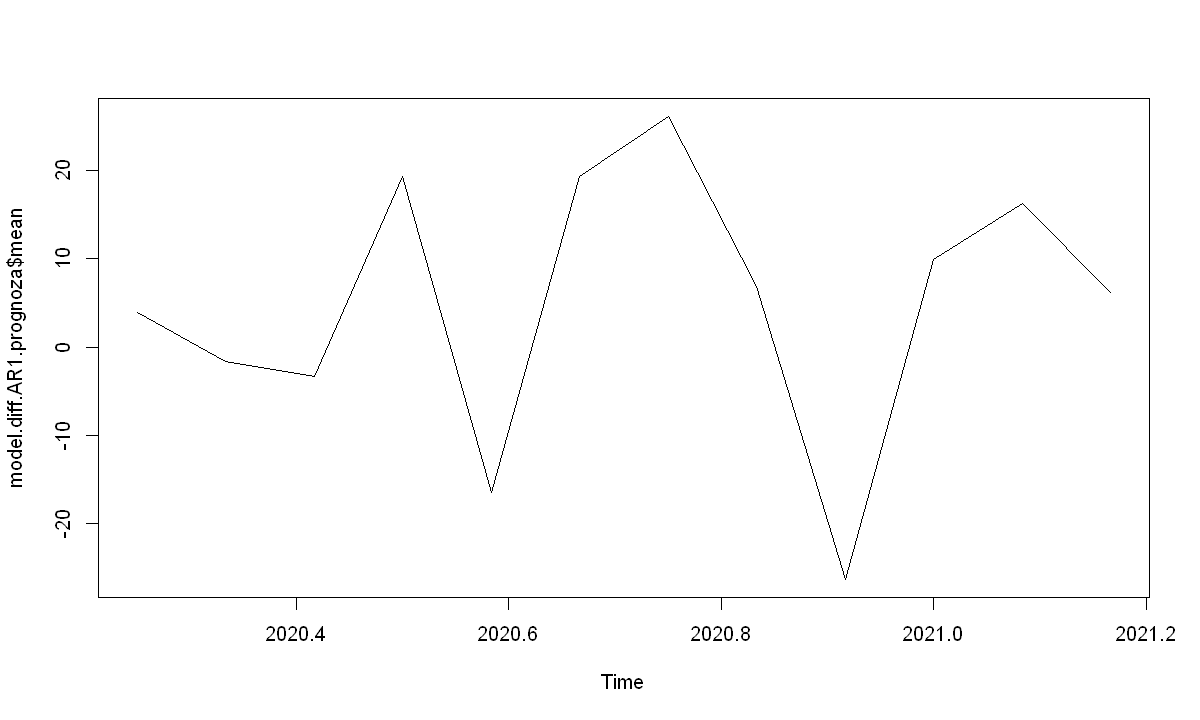

ME       MAE       MPE      MAPE      RMSE 
-14.17826  18.24549 -24.95195  35.03429  23.28312

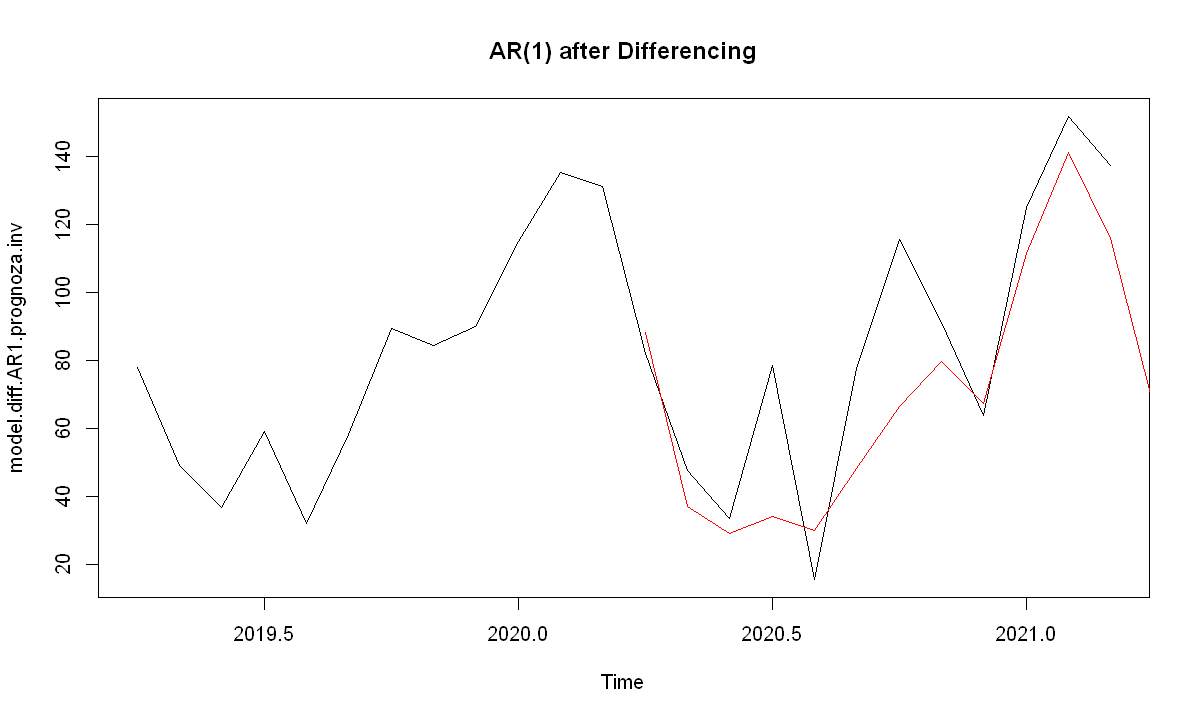

In [85]:
# AR(1) model for differenced data
model.diff.AR1 <- Arima(train_ts.diff12.diff, order=c(1,1,0), seasonal = c(0,1,0))
summary(model.diff.AR1)
coefs <- model.diff.AR1$coef
coef.sd <- sqrt(diag(model.diff.AR1$var.coef))
ind <- abs(coefs/(1.96 * coef.sd))
signif <- which(ind >= 1)

# Building model with significant coefficients
temp.fixed <- numeric(1)
temp.fixed[signif] <- NA
model.diff.AR1.signif <- Arima(y = train_ts.diff12.diff, order = c(1,1,0), seasonal = c(0,1,0), fixed = temp.fixed)
summary(model.diff.AR1.signif)

# Forecasting with the model
model.diff.AR1.prognoza <- forecast(model.diff.AR1.signif, h = 12)
model.diff.AR1.prognoza$mean
ts.plot(model.diff.AR1.prognoza$mean)

# Inverting the differencing
xi_values_for_diff12 <- tail(train_ts, 12)
model.diff.AR1.prognoza.inv <- diffinv(model.diff.AR1.prognoza$mean, differences=1, lag=12, xi=xi_values_for_diff12)
plot(model.diff.AR1.prognoza.inv, main = 'AR(1) after Differencing')
lines(test_ts, col = 'red')
accuracy(model.diff.AR1.prognoza.inv, test_ts)[, c('ME', 'MAE', 'MPE', 'MAPE', 'RMSE')]


# 6. Classical decomposition



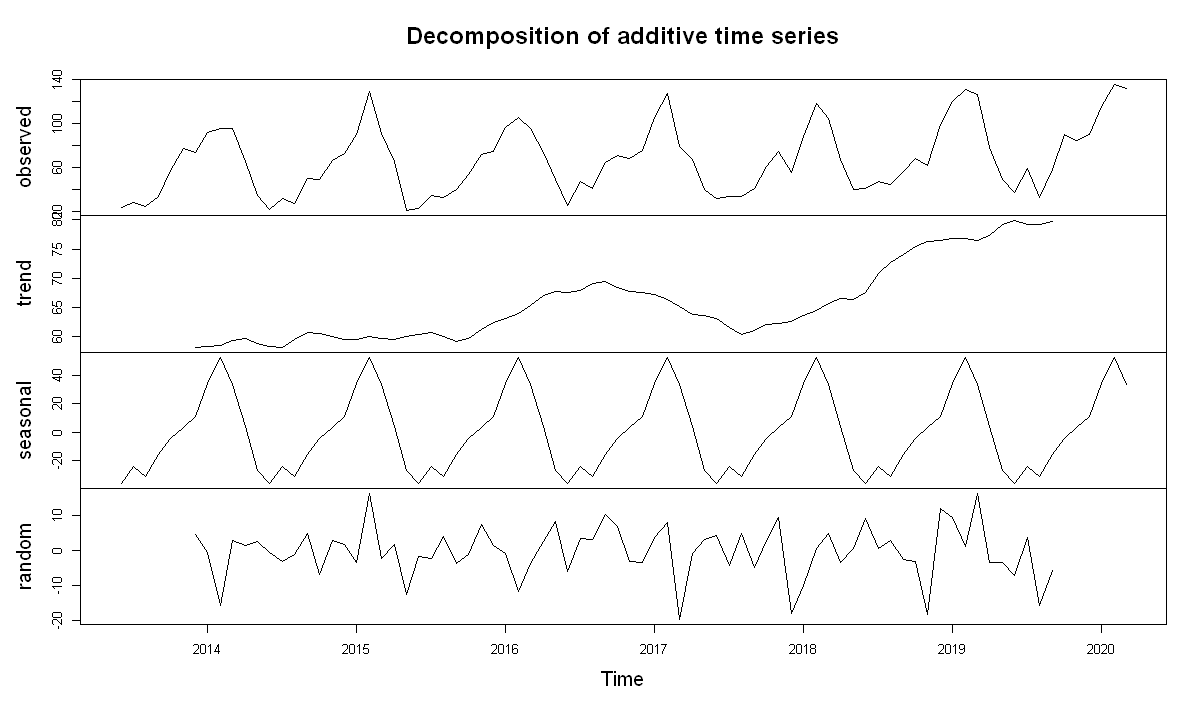

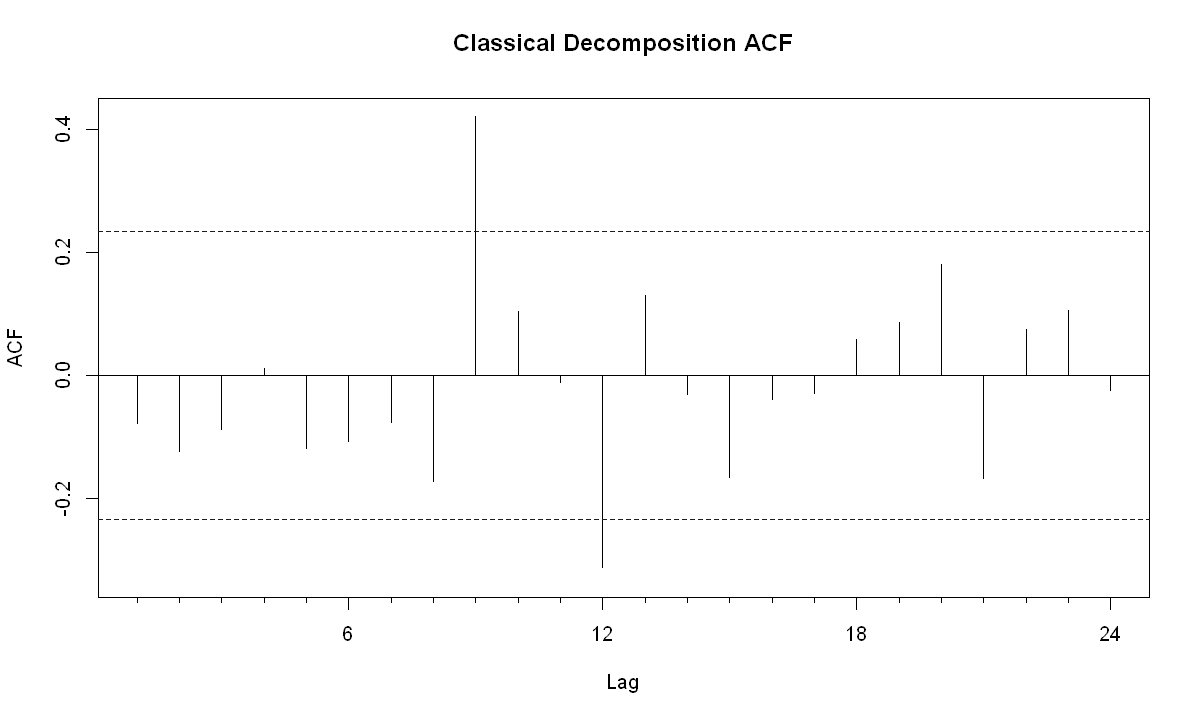

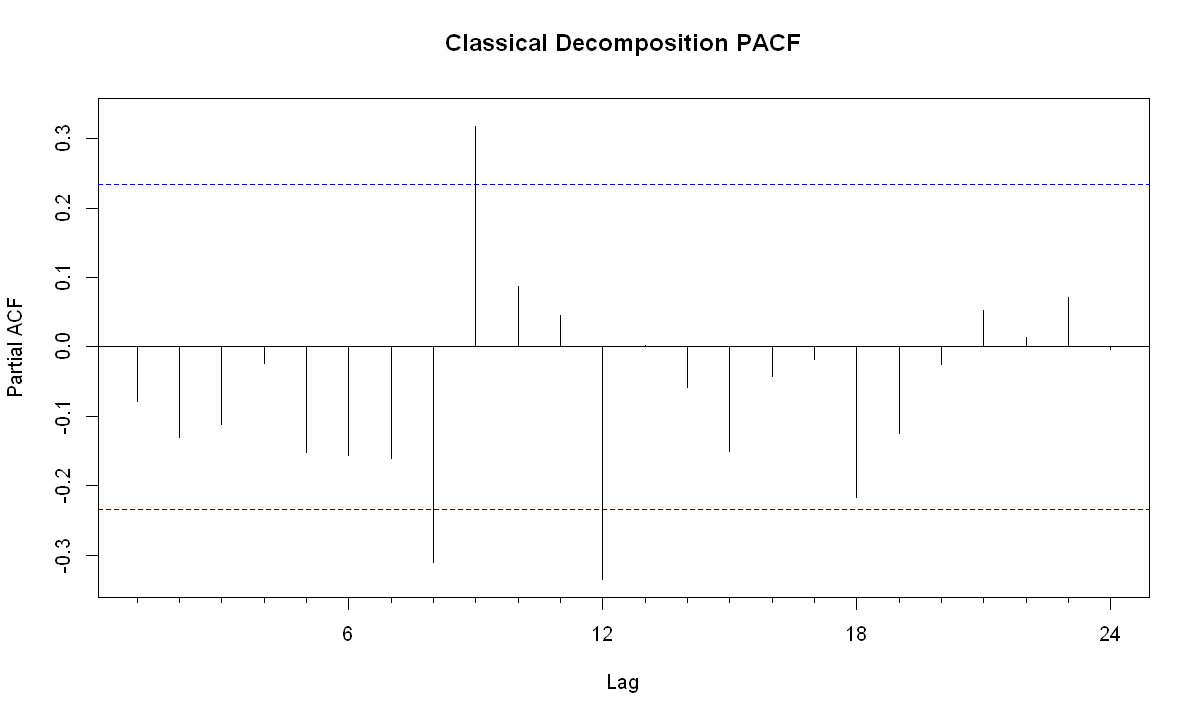

In [86]:
train.decom <- decompose(train_ts)
options(repr.plot.width=10, repr.plot.height=6)
plot(train.decom)
train.decom.res <- train.decom$random
Acf(train.decom.res, main = 'Classical Decomposition ACF')
Pacf(train.decom.res, main = 'Classical Decomposition PACF')

# 7. Building models on Non-differenced Data

## 7.1. MA(9) Model on Non-differenced Data

Series: train_ts 
ARIMA(0,1,9)(0,1,0)[12] 

Coefficients:
          ma1      ma2      ma3      ma4     ma5     ma6     ma7      ma8
      -0.7519  -0.2181  -0.1598  -0.1441  0.7132  0.1389  0.0007  -0.7767
s.e.   0.1741   0.2005   0.1997   0.1789  0.1610  0.1844  0.1964   0.1499
         ma9
      0.1978
s.e.  0.1112

sigma^2 = 138.9:  log likelihood = -270.99
AIC=561.98   AICc=565.77   BIC=584.32

Training set error measures:
                    ME     RMSE      MAE        MPE     MAPE     MASE
Training set 0.7420079 10.08185 7.358537 0.07112219 12.48838 0.665165
                    ACF1
Training set -0.03953962

Series: train_ts 
ARIMA(0,1,9)(0,1,0)[12] 

Coefficients:
          ma1  ma2  ma3  ma4     ma5  ma6  ma7      ma8  ma9
      -1.0092    0    0    0  0.5072    0    0  -0.4436    0
s.e.   0.0703    0    0    0  0.1434    0    0   0.1403    0

sigma^2 = 146:  log likelihood = -276.74
AIC=561.47   AICc=562.1   BIC=570.41

Training set error measures:
                    ME     RMSE      MAE       MPE     MAPE      MASE
Training set 0.7611565 10.84122 7.867818 -0.527616 13.56607 0.7112008
                   ACF1
Training set 0.02891238

Warning message in predict.Arima(object, n.ahead = h):
"część średniej kroczącej modelu nie jest odwracalna"


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2020,,,,91.54741,58.72415,43.68286,63.21377,45.32073,70.92392,98.06764,89.65087,95.30111
2021,120.32257,140.81052,136.59444,,,,,,,,,


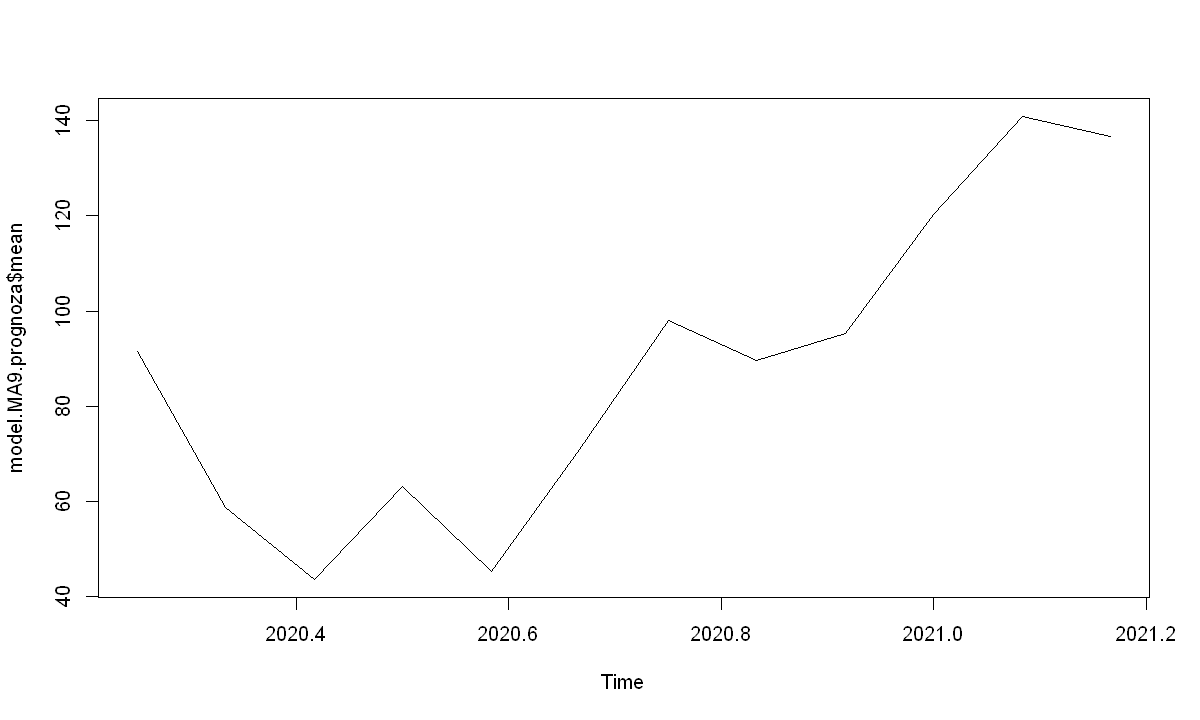

,ME,MAE,MPE,MAPE,RMSE
Training set,0.7611565,7.867818,-0.527616,13.56607,10.84122
Test set,-17.0809539,17.148586,-35.195877,35.24377,19.71238


Series: train_ts 
ARIMA(0,1,9)(0,1,0)[12] 

Coefficients:
          ma1  ma2  ma3  ma4     ma5  ma6  ma7      ma8  ma9
      -1.0092    0    0    0  0.5072    0    0  -0.4436    0
s.e.   0.0703    0    0    0  0.1434    0    0   0.1403    0

sigma^2 = 146:  log likelihood = -276.74
AIC=561.47   AICc=562.1   BIC=570.41

Training set error measures:
                    ME     RMSE      MAE       MPE     MAPE      MASE
Training set 0.7611565 10.84122 7.867818 -0.527616 13.56607 0.7112008
                   ACF1
Training set 0.02891238

[1] 561.4735

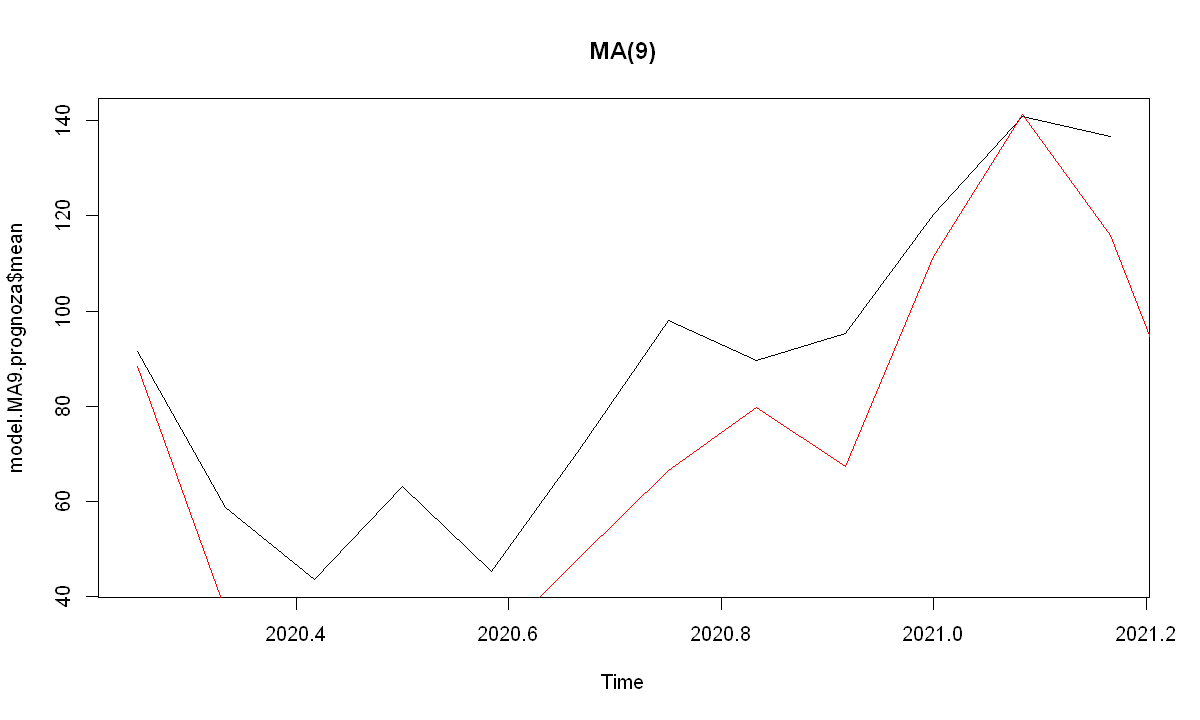

In [87]:
# MA(9) model on non-differenced data
model.MA9 <- Arima(train_ts, order = c(0,1,9), seasonal = c(0,1,0))
summary(model.MA9)

coefsMA9 <- model.MA9$coef
coefs.sdMA9 <- sqrt(diag(model.MA9$var.coef))
indMA9 <- abs(coefsMA9/(1.96*coefs.sdMA9))
signifMA9 <- which(indMA9 >= 1)

# Building model with significant coefficients
temp.fixed <- numeric(9)
temp.fixed[signifMA9] <- NA
model.MA9.fixed <- Arima(train_ts, order = c(0,1,9), seasonal = c(0,1,0), fixed = temp.fixed)
summary(model.MA9.fixed)

# Forecasting with the model
model.MA9.prognoza <- forecast(model.MA9.fixed, h = 12)
model.MA9.prognoza$mean
ts.plot(model.MA9.prognoza$mean)
plot(model.MA9.prognoza$mean, main = 'MA(9)')
lines(test_ts, col = 'red')
accuracy(model.MA9.prognoza, test_ts)[, c('ME', 'MAE', 'MPE', 'MAPE', 'RMSE')]
summary(model.MA9.fixed)
AIC(model.MA9.fixed)


## 7.2. AR(9) Model on Non-differenced Data

Series: train_ts 
ARIMA(9,1,0)(0,1,0)[12] 

Coefficients:
          ar1      ar2      ar3      ar4      ar5      ar6      ar7      ar8
      -0.6444  -0.5547  -0.5076  -0.1369  -0.1412  -0.1021  -0.1234  -0.4076
s.e.   0.1216   0.1349   0.1505   0.1668   0.1640   0.1642   0.1540   0.1400
         ar9
      0.0544
s.e.  0.1296

sigma^2 = 158.4:  log likelihood = -269.45
AIC=558.9   AICc=562.7   BIC=581.25

Training set error measures:
                     ME     RMSE      MAE       MPE     MAPE      MASE
Training set 0.04737311 10.76653 7.782014 -1.560915 13.46446 0.7034446
                    ACF1
Training set -0.02997355

Series: train_ts 
ARIMA(9,1,0)(0,1,0)[12] 

Coefficients:
          ar1      ar2      ar3  ar4  ar5  ar6  ar7      ar8  ar9
      -0.6495  -0.5217  -0.4394    0    0    0    0  -0.3747    0
s.e.   0.0918   0.1022   0.0911    0    0    0    0   0.0815    0

sigma^2 = 150.5:  log likelihood = -270.3
AIC=550.61   AICc=551.56   BIC=561.78

Training set error measures:
                     ME     RMSE      MAE       MPE     MAPE      MASE
Training set 0.01066024 10.92098 7.922381 -1.599832 13.50274 0.7161329
                    ACF1
Training set -0.01027411

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2020,,,,84.96767,45.01853,31.47302,59.26538,46.30172,59.40533,85.60342,84.30075,95.28136
2021,121.22908,137.10101,131.05813,,,,,,,,,


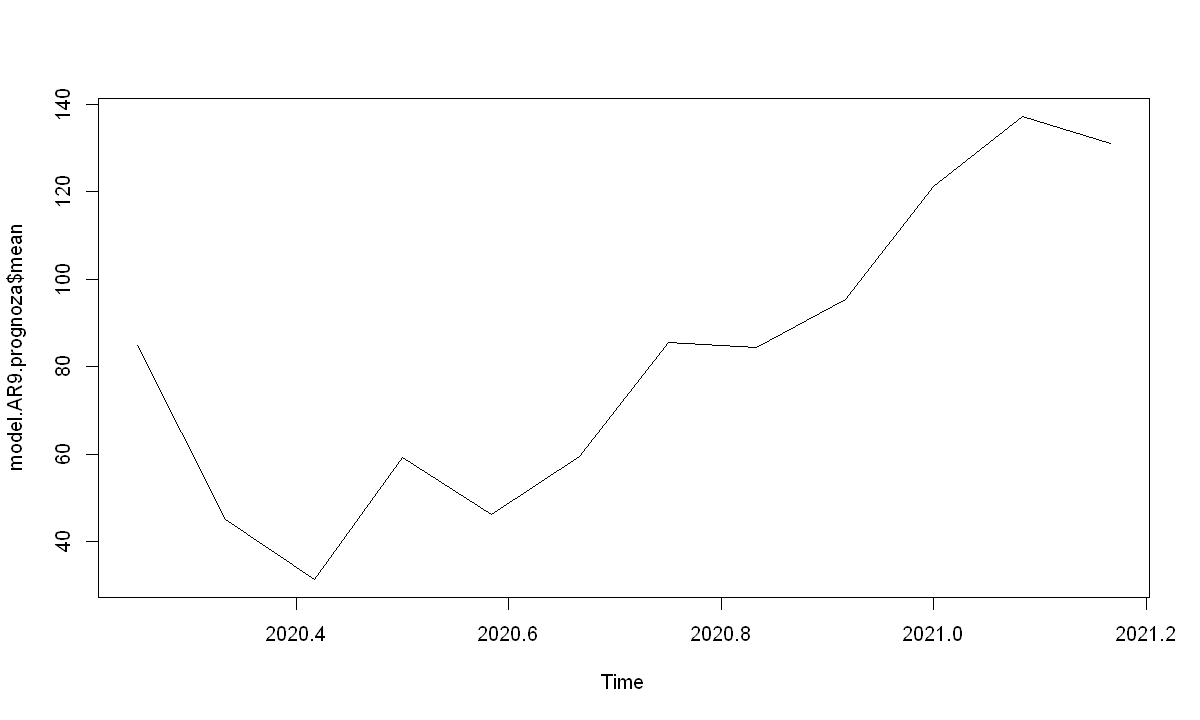

,ME,MAE,MPE,MAPE,RMSE
Training set,0.01066024,7.922381,-1.599832,13.50274,10.92098
Test set,-10.98473727,12.241939,-22.641351,23.77337,14.73456


Series: train_ts 
ARIMA(9,1,0)(0,1,0)[12] 

Coefficients:
          ar1      ar2      ar3  ar4  ar5  ar6  ar7      ar8  ar9
      -0.6495  -0.5217  -0.4394    0    0    0    0  -0.3747    0
s.e.   0.0918   0.1022   0.0911    0    0    0    0   0.0815    0

sigma^2 = 150.5:  log likelihood = -270.3
AIC=550.61   AICc=551.56   BIC=561.78

Training set error measures:
                     ME     RMSE      MAE       MPE     MAPE      MASE
Training set 0.01066024 10.92098 7.922381 -1.599832 13.50274 0.7161329
                    ACF1
Training set -0.01027411

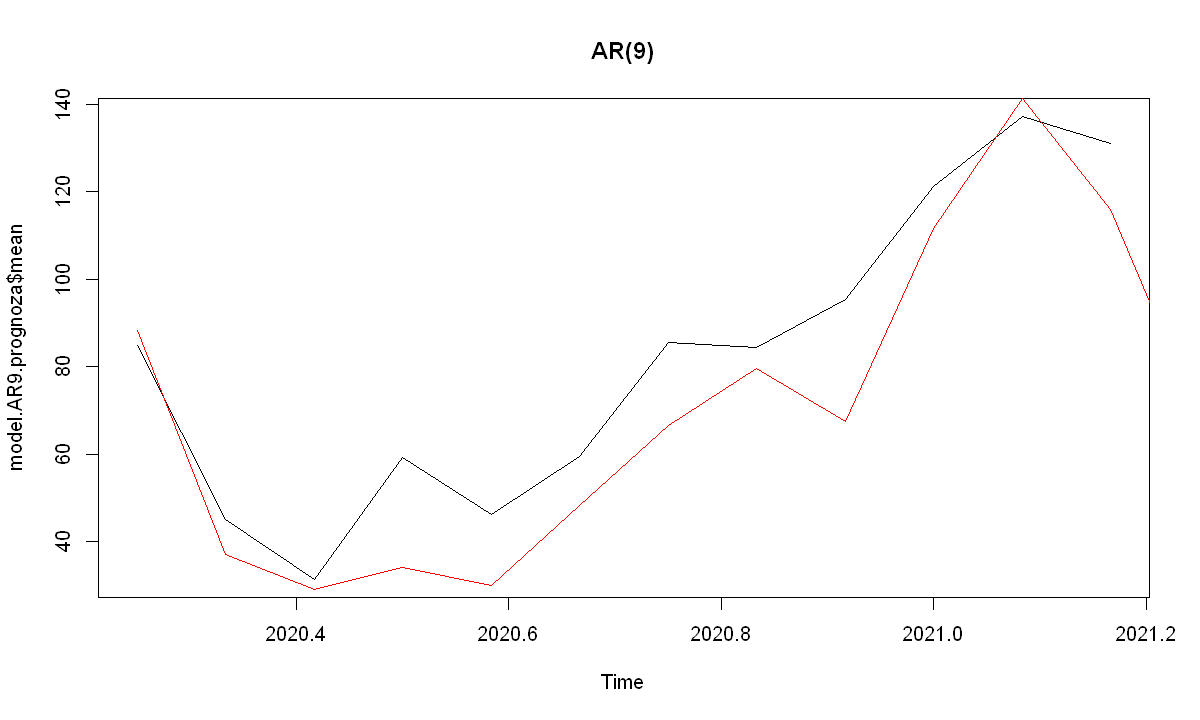

In [88]:
# AR(9) model on non-differenced data
model.AR9 <- Arima(train_ts, order = c(9,1,0), seasonal = c(0,1,0))
summary(model.AR9)

coefsAR9 <- model.AR9$coef
coefs.sdAR9 <- sqrt(diag(model.AR9$var.coef))
indAR9 <- abs(coefsAR9/(1.96*coefs.sdAR9))
signifAR9 <- which(indAR9 >= 1)

# Building model with significant coefficients
temp.fixed <- numeric(9)
temp.fixed[signifAR9] <- NA
model.AR9.fixed <- Arima(train_ts, order = c(9,1,0), seasonal = c(0,1,0), fixed = temp.fixed)
summary(model.AR9.fixed)

# Forecasting with the model
model.AR9.prognoza <- forecast(model.AR9.fixed, h = 12)
model.AR9.prognoza$mean
ts.plot(model.AR9.prognoza$mean)
plot(model.AR9.prognoza$mean, main = 'AR(9)')
lines(test_ts, col = 'red')
accuracy(model.AR9.prognoza, test_ts)[, c('ME', 'MAE', 'MPE', 'MAPE', 'RMSE')]
summary(model.AR9.fixed)


# 8. Regression-based Decomposition


Call:
tslm(formula = train_ts ~ trend + season)

Residuals:
     Min       1Q   Median       3Q      Max 
-25.3516  -4.1184   0.1075   4.5950  17.4793 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  87.75552    3.97647  22.069  < 2e-16 ***
trend         0.29949    0.04335   6.909 1.94e-09 ***
season2      18.74859    4.93474   3.799 0.000309 ***
season3       1.52981    4.93531   0.310 0.757517    
season4     -30.64222    5.13769  -5.964 9.43e-08 ***
season5     -61.41519    5.13677 -11.956  < 2e-16 ***
season6     -69.96759    4.94387 -14.152  < 2e-16 ***
season7     -58.91607    4.94140 -11.923  < 2e-16 ***
season8     -65.85302    4.93931 -13.332  < 2e-16 ***
season9     -50.90610    4.93759 -10.310 1.31e-15 ***
season10    -36.09566    4.93626  -7.312 3.60e-10 ***
season11    -28.54700    4.93531  -5.784 1.94e-07 ***
season12    -23.44220    4.93474  -4.750 1.07e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual

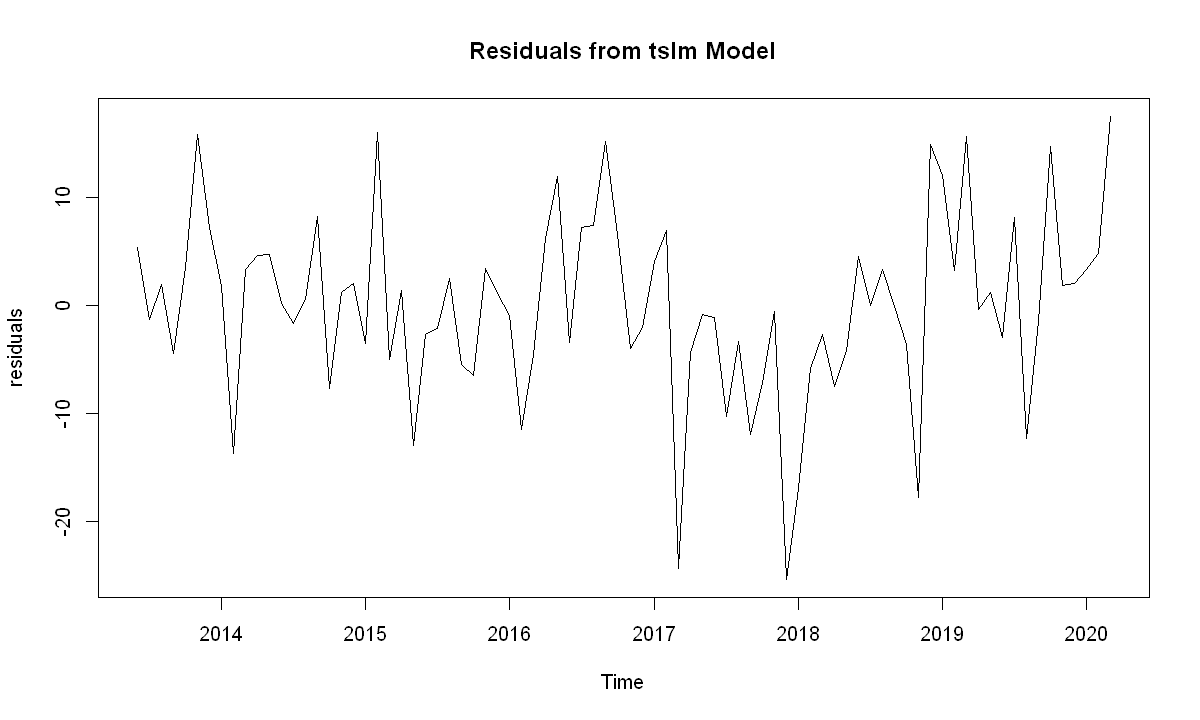

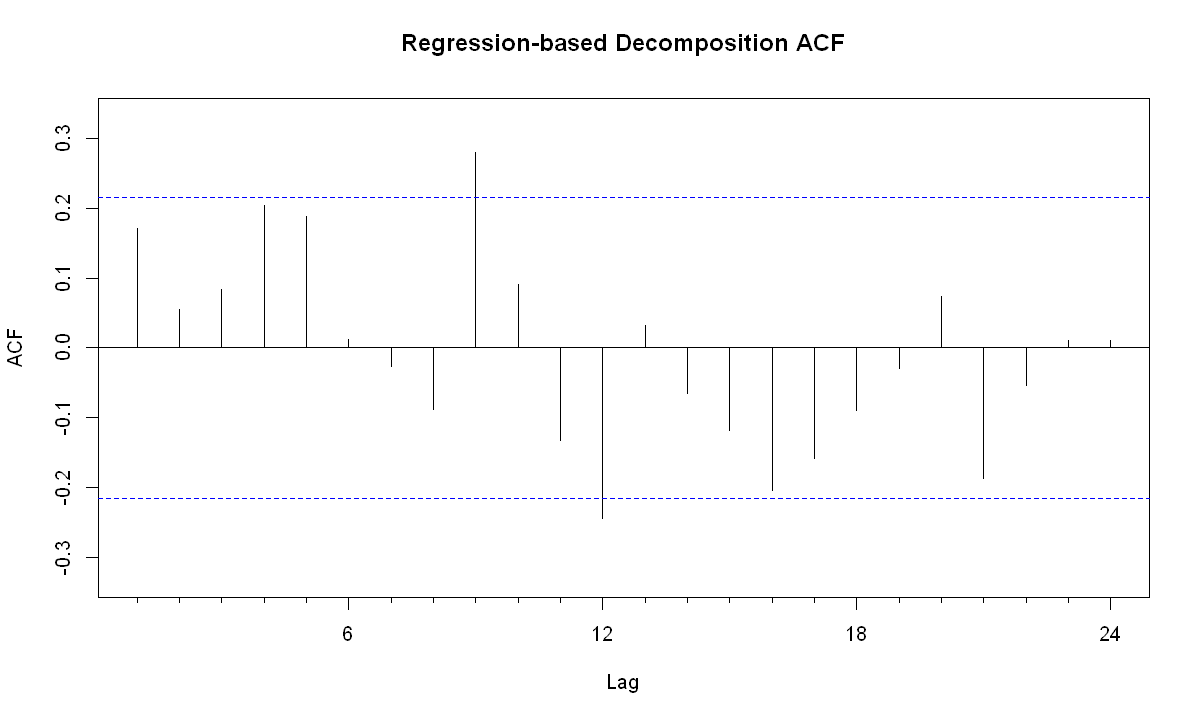

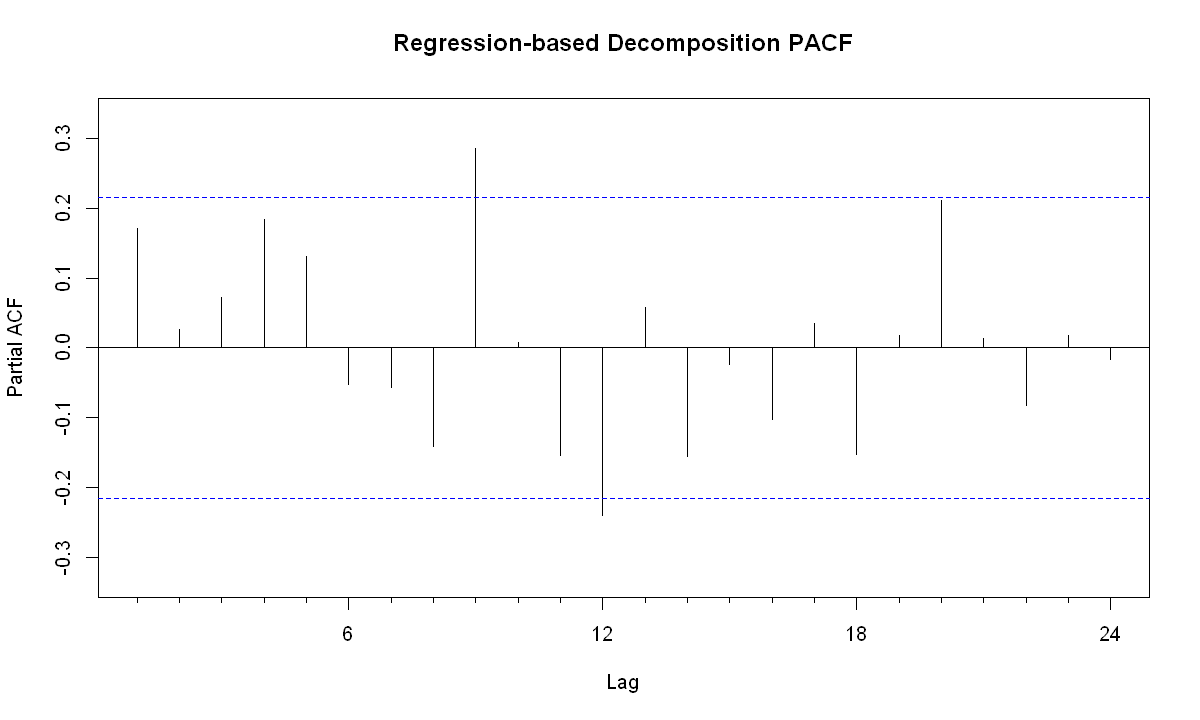

In [89]:
# Create the tslm model
train.tslm <- tslm(train_ts ~ trend + season)

# Print the summary of the model
summary(train.tslm)

# Extract and plot the residuals
residuals <- residuals(train.tslm)

options(repr.plot.width=10, repr.plot.height=6)
plot(residuals, type = 'l', main = "Residuals from tslm Model")

# Plot the ACF and PACF of the residuals
Acf(residuals, main = 'Regression-based Decomposition ACF')
Pacf(residuals, main = 'Regression-based Decomposition PACF')


In [90]:
str(train_ts)


 Time-Series [1:82] from 2013 to 2020: 23.5 28.2 24.7 33.6 56.7 ...
 - attr(*, "names")= chr [1:82] "Jun" "Jul" "Aug" "Sep" ...


In [91]:
summary(train.tslm)



Call:
tslm(formula = train_ts ~ trend + season)

Residuals:
     Min       1Q   Median       3Q      Max 
-25.3516  -4.1184   0.1075   4.5950  17.4793 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  87.75552    3.97647  22.069  < 2e-16 ***
trend         0.29949    0.04335   6.909 1.94e-09 ***
season2      18.74859    4.93474   3.799 0.000309 ***
season3       1.52981    4.93531   0.310 0.757517    
season4     -30.64222    5.13769  -5.964 9.43e-08 ***
season5     -61.41519    5.13677 -11.956  < 2e-16 ***
season6     -69.96759    4.94387 -14.152  < 2e-16 ***
season7     -58.91607    4.94140 -11.923  < 2e-16 ***
season8     -65.85302    4.93931 -13.332  < 2e-16 ***
season9     -50.90610    4.93759 -10.310 1.31e-15 ***
season10    -36.09566    4.93626  -7.312 3.60e-10 ***
season11    -28.54700    4.93531  -5.784 1.94e-07 ***
season12    -23.44220    4.93474  -4.750 1.07e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual

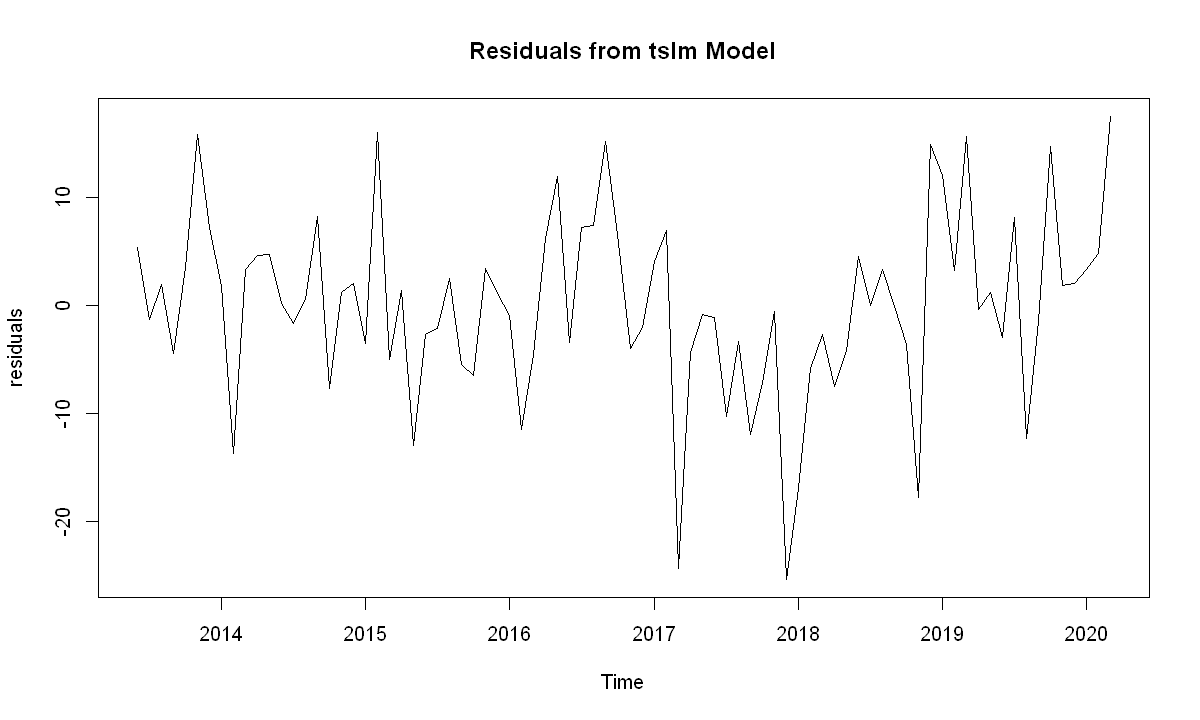

In [92]:
residuals <- residuals(train.tslm)

options(repr.plot.width=10, repr.plot.height=6)
plot(residuals, type = 'l', main = "Residuals from tslm Model")


# 9. Forecasting

## 9.1. Trend + Seasonality + MA(12)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2020,,,,81.97128,51.49780,43.24490,54.59592,47.95846,63.20487,78.31481,86.16296,91.56725
2021,115.30895,134.35703,117.43774,85.56521,,,,,,,,


Series: tslm.prognoza.res 
ARIMA(0,0,12) with non-zero mean 

Coefficients:
         ma1     ma2     ma3     ma4     ma5     ma6     ma7     ma8     ma9
      0.1478  0.2119  0.1954  0.1081  0.3151  0.0951  0.1534  0.0846  0.6699
s.e.  0.1262  0.1501  0.1479  0.1318  0.1583  0.1964  0.1996  0.1824  0.1681
        ma10     ma11     ma12    mean
      0.1899  -0.1914  -0.1502  0.6163
s.e.  0.1431   0.1344   0.1600  1.9655

sigma^2 = 49.24:  log likelihood = -274.99
AIC=577.98   AICc=584.25   BIC=611.67

Training set error measures:
                   ME     RMSE      MAE      MPE     MAPE      MASE        ACF1
Training set 0.014705 6.436589 4.914108 363.7676 478.0164 0.4621435 0.005415165

Series: train_ts 
ARIMA(0,0,12) with non-zero mean 

Coefficients:
      ma1  ma2  ma3  ma4     ma5  ma6  ma7  ma8     ma9  ma10  ma11  ma12  mean
        0    0    0    0  0.2552    0    0    0  0.7310     0     0     0     0
s.e.    0    0    0    0  0.0744    0    0    0  0.0894     0     0     0     0

sigma^2 = 2517:  log likelihood = -440.99
AIC=887.99   AICc=888.3   BIC=895.21

Training set error measures:
                   ME     RMSE      MAE     MPE     MAPE    MASE      ACF1
Training set 35.41989 49.55706 37.30262 45.4944 51.35542 3.37192 0.7062676

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2020,,,,12.225634,8.925151,31.219223,47.964005,39.464224,3.358950,42.192242,74.824376,92.423982
2021,0.000000,0.000000,0.000000,,,,,,,,,


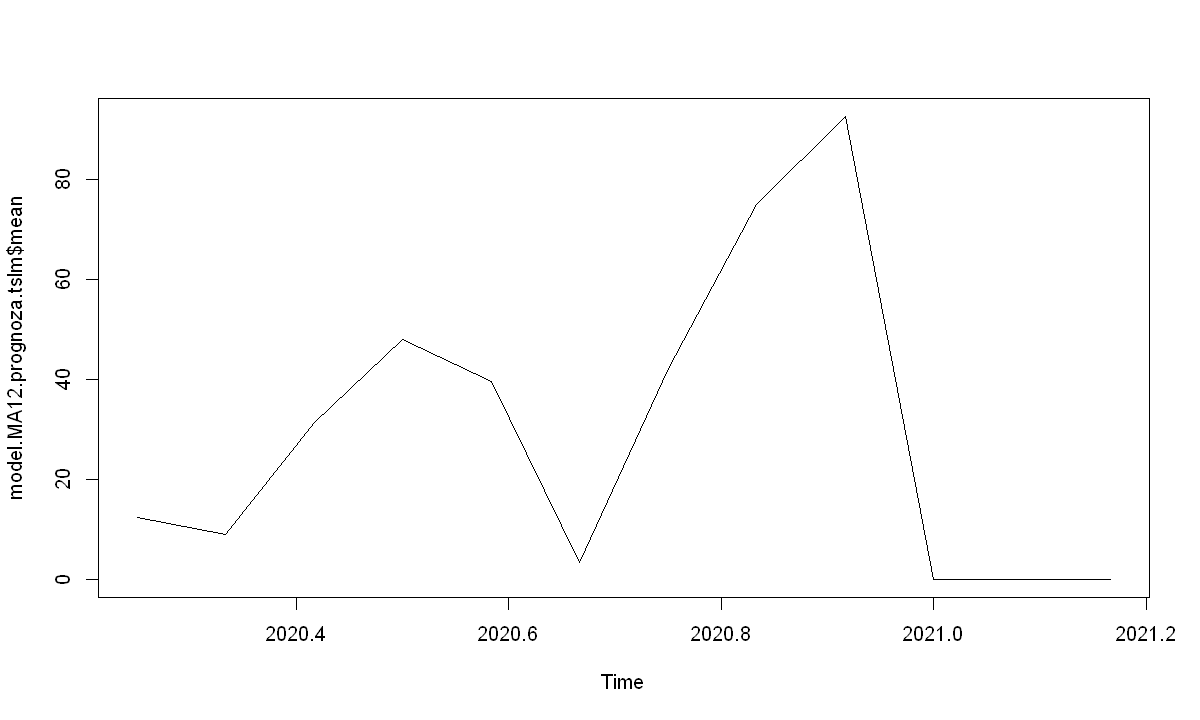

,ME,MAE,MPE,MAPE,RMSE
Training set,35.41989,37.30262,45.49440,51.35542,49.55706
Test set,41.38256,49.79888,40.09634,59.54376,68.28561


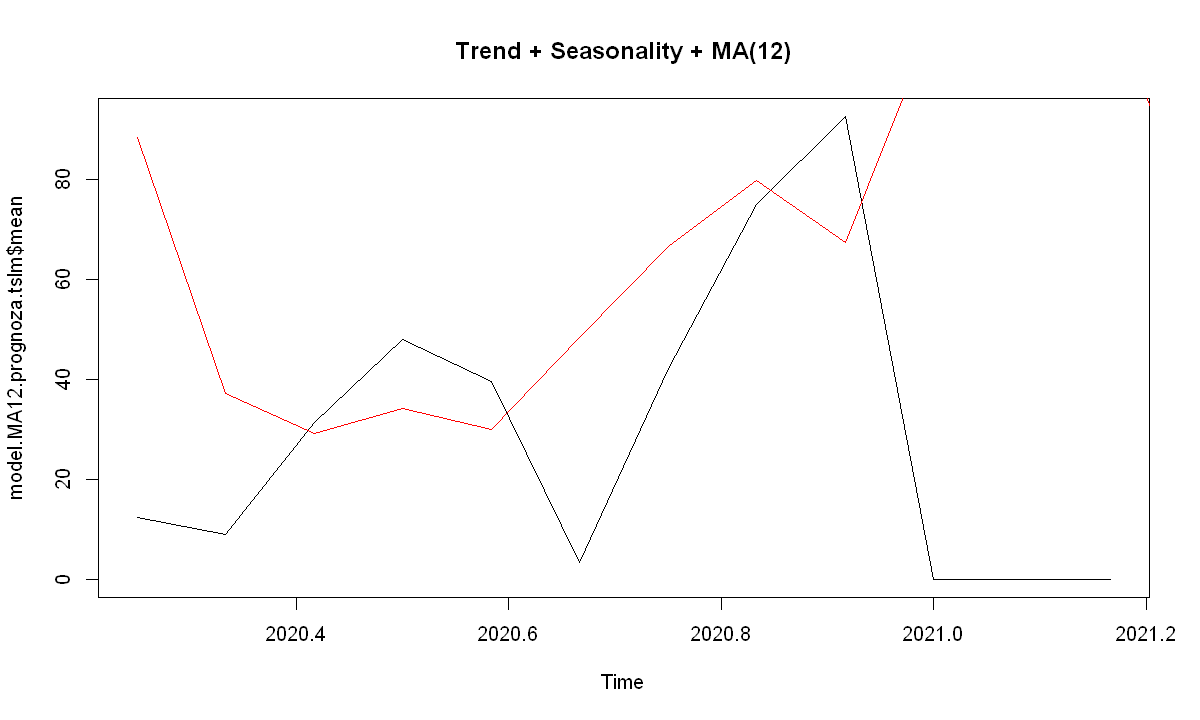

In [93]:
# Forecasting with Trend + Seasonality + MA(12)
tslm.prognoza <- forecast(train.tslm, h =13)
tslm.prognoza$mean
tslm.prognoza.res <- tslm.prognoza$residuals

model.tslm.MA9 <- Arima(tslm.prognoza.res, order= c(0,0,12), seasonal = c(0,0,0))
summary(model.tslm.MA9)

coefsMA12 <- model.tslm.MA9$coef
coefs.sdMA12 <- sqrt(diag(model.tslm.MA9$var.coef))
indMA12 <- abs(coefsMA12/(1.96*coefs.sdMA12))
signifMA12 <- which(indMA12 >= 1)

# Building model with significant coefficients
temp.fixed <- numeric(13)
temp.fixed[signifMA12] <- NA
model.tslm.MA9.fixed <- Arima(train_ts, order = c(0,0,12), seasonal = c(0,0,0), fixed = temp.fixed)
summary(model.tslm.MA9.fixed)

# Forecasting with the model
model.MA12.prognoza.tslm <- forecast(model.tslm.MA9.fixed, h = 12)
model.MA12.prognoza.tslm$mean
ts.plot(model.MA12.prognoza.tslm$mean)
plot(model.MA12.prognoza.tslm$mean, main = 'Trend + Seasonality + MA(12)')
lines(test_ts, col = 'red')

accuracy(model.MA12.prognoza.tslm, test_ts)[, c('ME', 'MAE', 'MPE', 'MAPE', 'RMSE')]


## 9.2. MA(12) Model without Differencing

Series: train_ts 
ARIMA(0,1,12)(0,1,0)[12] 

Coefficients:
          ma1     ma2     ma3      ma4     ma5      ma6      ma7      ma8
      -0.8854  0.0594  0.1921  -0.1059  0.1762  -0.1412  -0.0666  -0.1914
s.e.   0.1729  0.1987  0.1983   0.2174  0.2734   0.1794   0.1706   0.2348
         ma9     ma10     ma11    ma12
      0.8560  -0.6373  -0.2724  0.0164
s.e.  0.2565   0.2744   0.1539  0.2178

sigma^2 = 111.6:  log likelihood = -263.05
AIC=552.1   AICc=558.72   BIC=581.14

Training set error measures:
                    ME     RMSE      MAE        MPE    MAPE      MASE
Training set 0.3295586 8.807274 6.361872 -0.8237081 10.7465 0.5750729
                    ACF1
Training set -0.01567817

Series: train_ts 
ARIMA(0,1,12)(0,1,0)[12] 

Coefficients:
          ma1  ma2  ma3  ma4  ma5  ma6  ma7  ma8     ma9     ma10  ma11  ma12
      -0.8752    0    0    0    0    0    0    0  0.6005  -0.7107     0     0
s.e.   0.0757    0    0    0    0    0    0    0  0.1587   0.1513     0     0

sigma^2 = 132.8:  log likelihood = -269.32
AIC=546.64   AICc=547.27   BIC=555.58

Training set error measures:
                    ME     RMSE      MAE        MPE     MAPE      MASE
Training set 0.5807016 10.33776 7.492829 -0.7343864 12.90437 0.6773042
                   ACF1
Training set 0.01938377

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2020,,,,84.46235,50.73853,29.63162,68.81825,48.87901,53.09270,93.45890,91.40868,105.09596
2021,118.84738,139.33533,135.11924,,,,,,,,,


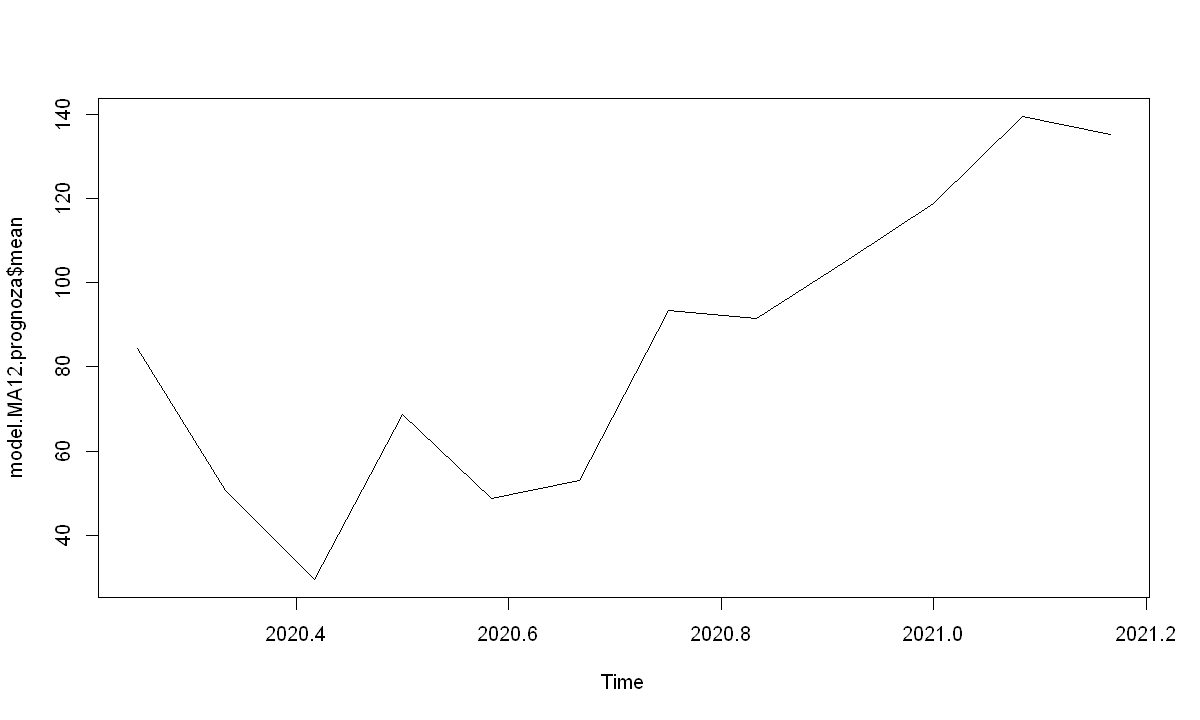

,ME,MAE,MPE,MAPE,RMSE
Training set,0.5807016,7.492829,-0.7343864,12.90437,10.33776
Test set,-14.1416161,15.110652,-28.4996078,29.46320,19.35495


Series: train_ts 
ARIMA(0,1,9)(0,1,0)[12] 

Coefficients:
          ma1  ma2  ma3  ma4     ma5  ma6  ma7      ma8  ma9
      -1.0092    0    0    0  0.5072    0    0  -0.4436    0
s.e.   0.0703    0    0    0  0.1434    0    0   0.1403    0

sigma^2 = 146:  log likelihood = -276.74
AIC=561.47   AICc=562.1   BIC=570.41

Training set error measures:
                    ME     RMSE      MAE       MPE     MAPE      MASE
Training set 0.7611565 10.84122 7.867818 -0.527616 13.56607 0.7112008
                   ACF1
Training set 0.02891238

[1] 561.4735

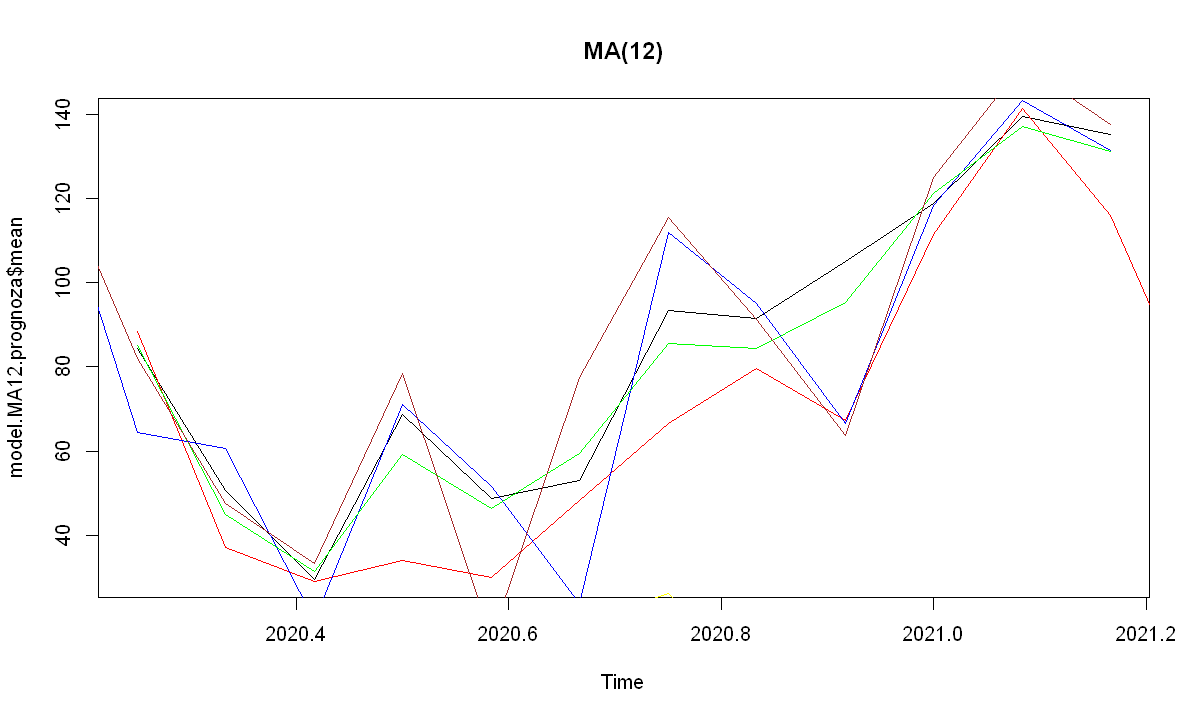

In [94]:
# MA(12) model without differencing
model.MA12 <- Arima(train_ts, order = c(0,1,12), seasonal = c(0,1,0))
summary(model.MA12)

coefsMA12 <- model.MA12$coef
coefs.sdMA12 <- sqrt(diag(model.MA12$var.coef))
indMA12 <- abs(coefsMA12/(1.96*coefs.sdMA12))
signifMA12 <- which(indMA12 >= 1)

# Building model with significant coefficients
temp.fixed <- numeric(12)
temp.fixed[signifMA12] <- NA
model.MA12.fixed <- Arima(train_ts, order = c(0,1,12), seasonal = c(0,1,0), fixed = temp.fixed)
summary(model.MA12.fixed)

# Forecasting with the model
model.MA12.prognoza <- forecast(model.MA12.fixed, h = 12)
model.MA12.prognoza$mean
ts.plot(model.MA12.prognoza$mean)
plot(model.MA12.prognoza$mean, main = 'MA(12)')
lines(test_ts, col = 'red')
lines(model.diff.MA12.prognoza.inv, col = 'blue')
lines(model.AR9.prognoza$mean, col = 'green')
lines(model.diff.AR1.prognoza$mean, col = 'yellow')
lines(model.diff.AR1.prognoza.inv, col = 'brown')

accuracy(model.MA12.prognoza, test_ts)[, c('ME', 'MAE', 'MPE', 'MAPE', 'RMSE')]
summary(model.MA9.fixed)
AIC(model.MA9.fixed)


## 9.3. MA(1) Model without Differencing

Series: train_ts 
ARIMA(0,1,1)(0,1,0)[12] 

Coefficients:
          ma1
      -0.8104
s.e.   0.0998

sigma^2 = 198.6:  log likelihood = -280.49
AIC=564.98   AICc=565.16   BIC=569.44

Training set error measures:
                    ME     RMSE      MAE       MPE     MAPE      MASE
Training set 0.2793531 12.83332 8.967067 -1.911853 15.25397 0.8105659
                   ACF1
Training set 0.04615017

Series: train_ts 
ARIMA(0,1,1)(0,1,0)[12] 

Coefficients:
          ma1
      -0.8104
s.e.   0.0998

sigma^2 = 198.6:  log likelihood = -280.49
AIC=564.98   AICc=565.16   BIC=569.44

Training set error measures:
                    ME     RMSE      MAE       MPE     MAPE      MASE
Training set 0.2793531 12.83332 8.967067 -1.911853 15.25397 0.8105659
                   ACF1
Training set 0.04615017

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2020,,,,83.19148,54.24585,41.84721,64.30195,37.22176,63.32256,94.62040,89.53263,95.18287
2021,120.20433,140.69228,136.47620,,,,,,,,,


,ME,MAE,MPE,MAPE,RMSE
Training set,0.2793531,8.967067,-1.911853,15.25397,12.83332
Test set,-14.3042463,15.258934,-29.095143,30.13820,17.86529


[1] 564.975

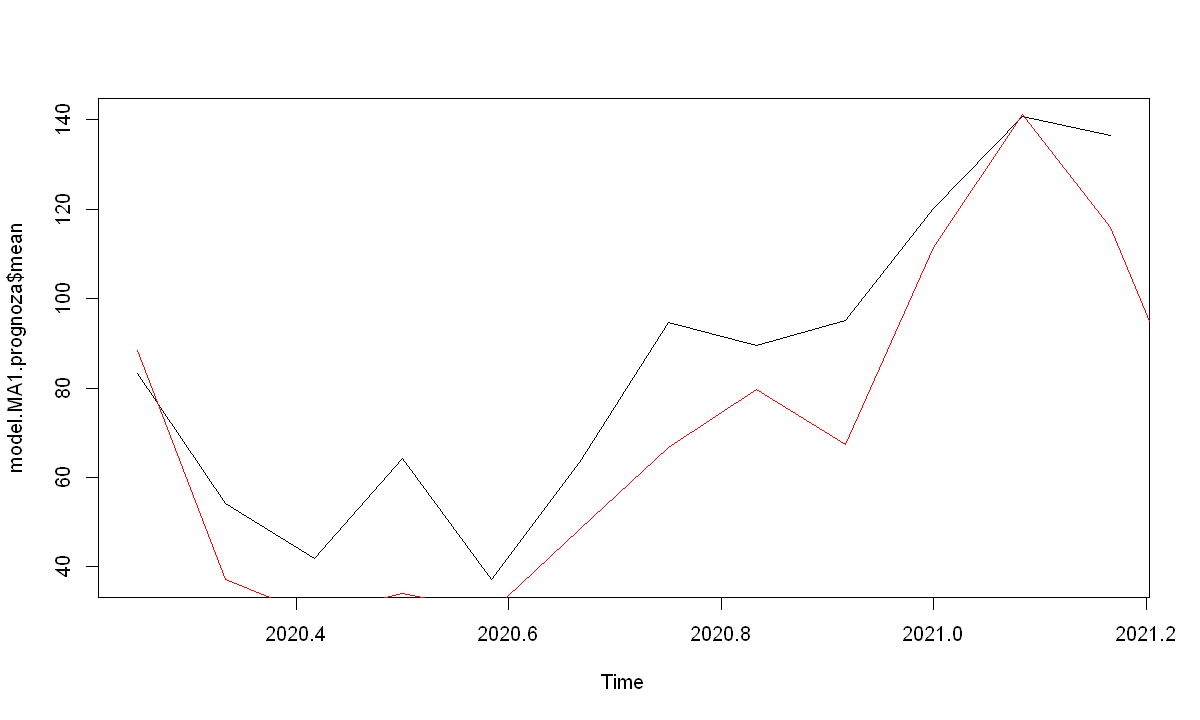

In [95]:
# MA(1) model without differencing
model.MA1 <- Arima(train_ts, order = c(0,1,1), seasonal = c(0,1,0))
summary(model.MA1)

# Check significance of coefficients
coefs <- model.MA1$coef
coefs.sd <- sqrt(diag(model.MA1$var.coef))
ind <- abs(coefs/(1.96*coefs.sd))
signif <- which(ind >= 1)

# Building model with significant coefficients
temp.fixed <- numeric(1)
temp.fixed[signif] <- NA
model.MA1.fixed <- Arima(train_ts, order = c(0,1,1), seasonal = c(0,1,0), fixed = temp.fixed)
summary(model.MA1.fixed)

# Forecasting with the model
model.MA1.prognoza <- forecast(model.MA1.fixed, h = 12)
model.MA1.prognoza$mean
ts.plot(model.MA1.prognoza$mean)
plot(model.MA1.prognoza$mean)
lines(test_ts, col = 'red')
accuracy(model.MA1.prognoza, test_ts)[, c('ME', 'MAE', 'MPE', 'MAPE', 'RMSE')]
AIC(model.MA1.fixed)


## 9.4. Automatic Model

Series: train_ts 
ARIMA(1,0,1)(1,1,1)[12] with drift 

Coefficients:
         ar1      ma1     sar1     sma1   drift
      0.9090  -0.7623  -0.3032  -0.6129  0.3261
s.e.  0.1148   0.1417   0.2124   0.3100  0.0998

sigma^2 = 99.36:  log likelihood = -262.98
AIC=537.96   AICc=539.29   BIC=551.45

Training set error measures:
                    ME     RMSE      MAE       MPE     MAPE      MASE      ACF1
Training set -0.228283 8.874539 6.136028 -2.749219 10.44316 0.5546579 0.0167327

Series: train_ts 
ARIMA(1,0,1)(1,1,1)[12] with drift 

Coefficients:
         ar1      ma1     sar1     sma1   drift
      0.9090  -0.7623  -0.3032  -0.6129  0.3261
s.e.  0.1148   0.1417   0.2124   0.3100  0.0998

sigma^2 = 99.36:  log likelihood = -262.98
AIC=537.96   AICc=539.29   BIC=551.45

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2020,,,,86.30509,56.82933,49.55097,58.90880,53.57165,66.87379,80.90163,84.26019,95.38393
2021,119.93574,138.25560,123.00075,,,,,,,,,


,ME,MAE,MPE,MAPE,RMSE
Training set,-0.228283,6.136028,-2.749219,10.44316,8.874539
Test set,-13.715743,14.557610,-32.639637,33.38322,17.009379


[1] 537.9601

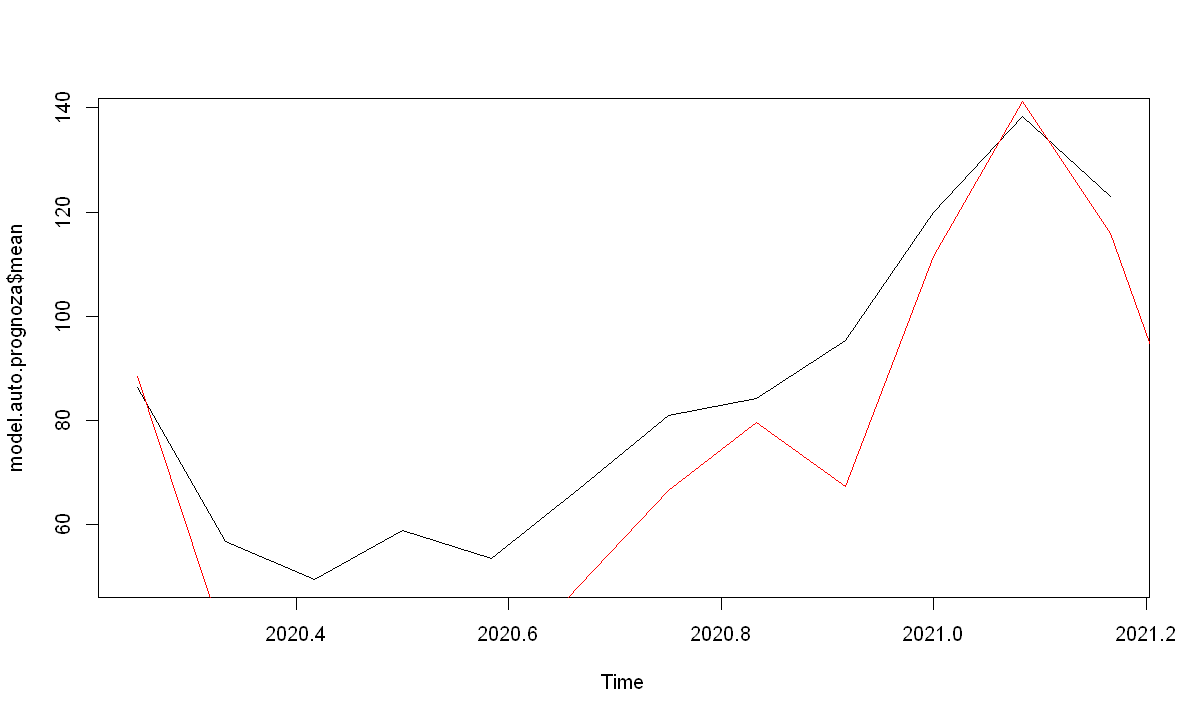

In [96]:
# Automatic model
model.auto <- auto.arima(train_ts)
summary(model.auto)
model.auto
model.auto.prognoza <- forecast(model.auto, h=12)
model.auto.prognoza$mean
ts.plot(model.auto.prognoza$mean)
plot(model.auto.prognoza$mean)
lines(test_ts, col = 'red')
accuracy(model.auto.prognoza, test_ts)[, c('ME', 'MAE', 'MPE', 'MAPE', 'RMSE')]
AIC(model.auto)


## 9.5. Automatic tslm Model

Series: train.tslm$residuals 
ARIMA(1,0,0)(0,0,1)[12] with zero mean 

Coefficients:
         ar1     sma1
      0.1707  -0.4413
s.e.  0.1139   0.2008

sigma^2 = 63.1:  log likelihood = -286.59
AIC=579.18   AICc=579.48   BIC=586.4

Training set error measures:
                     ME     RMSE      MAE       MPE    MAPE      MASE
Training set -0.2523432 7.846011 5.893512 -68.98006 392.628 0.5542509
                     ACF1
Training set -0.007895877

ME        MAE        MPE       MAPE       RMSE 
 -8.978506  12.031508 -24.517127  26.959029  13.922247

ERROR: Error in UseMethod("logLik"): niestosowalna metoda dla 'logLik' zastosowana do obiektu klasy "ts"


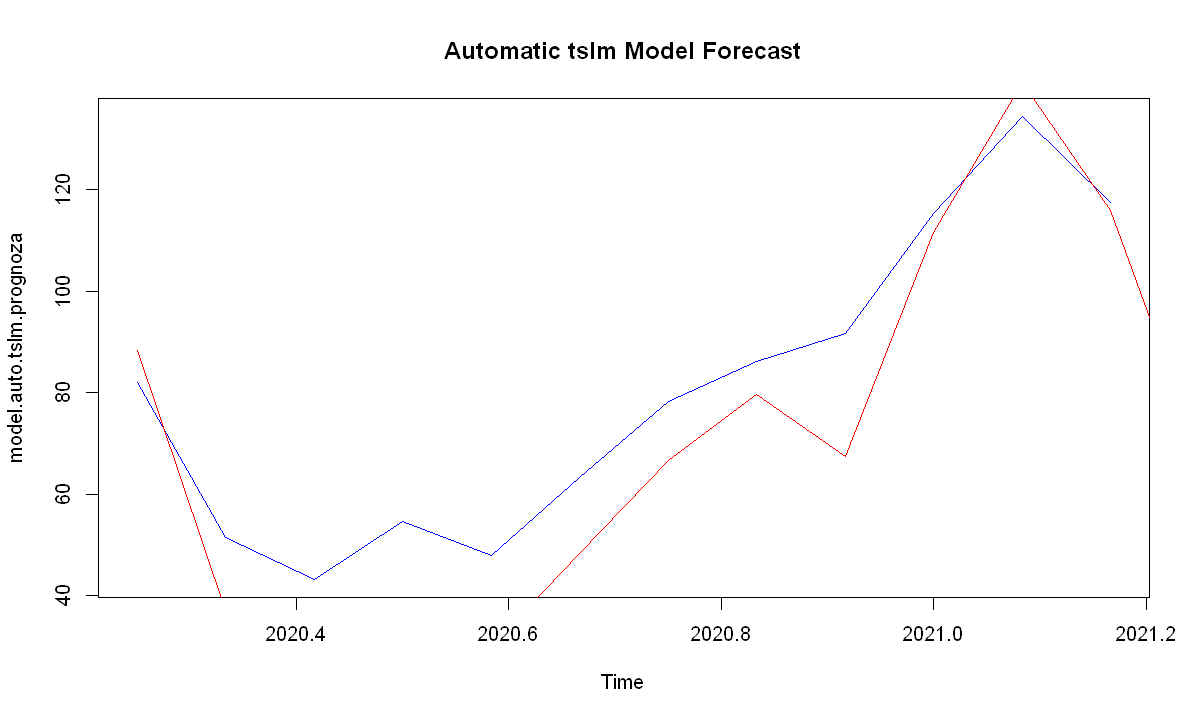

In [97]:
# Automatic tslm model
model.auto.tslm <- forecast(train.tslm, h=12)  # Forecast from the tslm model
model.auto.tslm.prognoza <- model.auto.tslm$mean  # Assign the forecasted values to model.auto.tslm.prognoza

# Fit an ARIMA model to the residuals
model.res.auto <- auto.arima(train.tslm$residuals)
summary(model.res.auto)

# Forecasting the residuals
model.res.auto.prognoza <- forecast(model.res.auto, h = 12)$mean

# Combine the tslm forecast and the residual forecast
model.tslm.res.auto.prognoza <- model.auto.tslm.prognoza + model.res.auto.prognoza

# Plot the combined forecast
options(repr.plot.width=10, repr.plot.height=6)
ts.plot(model.auto.tslm.prognoza, col = "blue", lty = 1, main = "Automatic tslm Model Forecast")
lines(test_ts, col = 'red')

# Calculate accuracy
accuracy(model.tslm.res.auto.prognoza, test_ts)[, c('ME', 'MAE', 'MPE', 'MAPE', 'RMSE')]
AIC(model.res.auto.prognoza)


# 10. Visualization and Plots

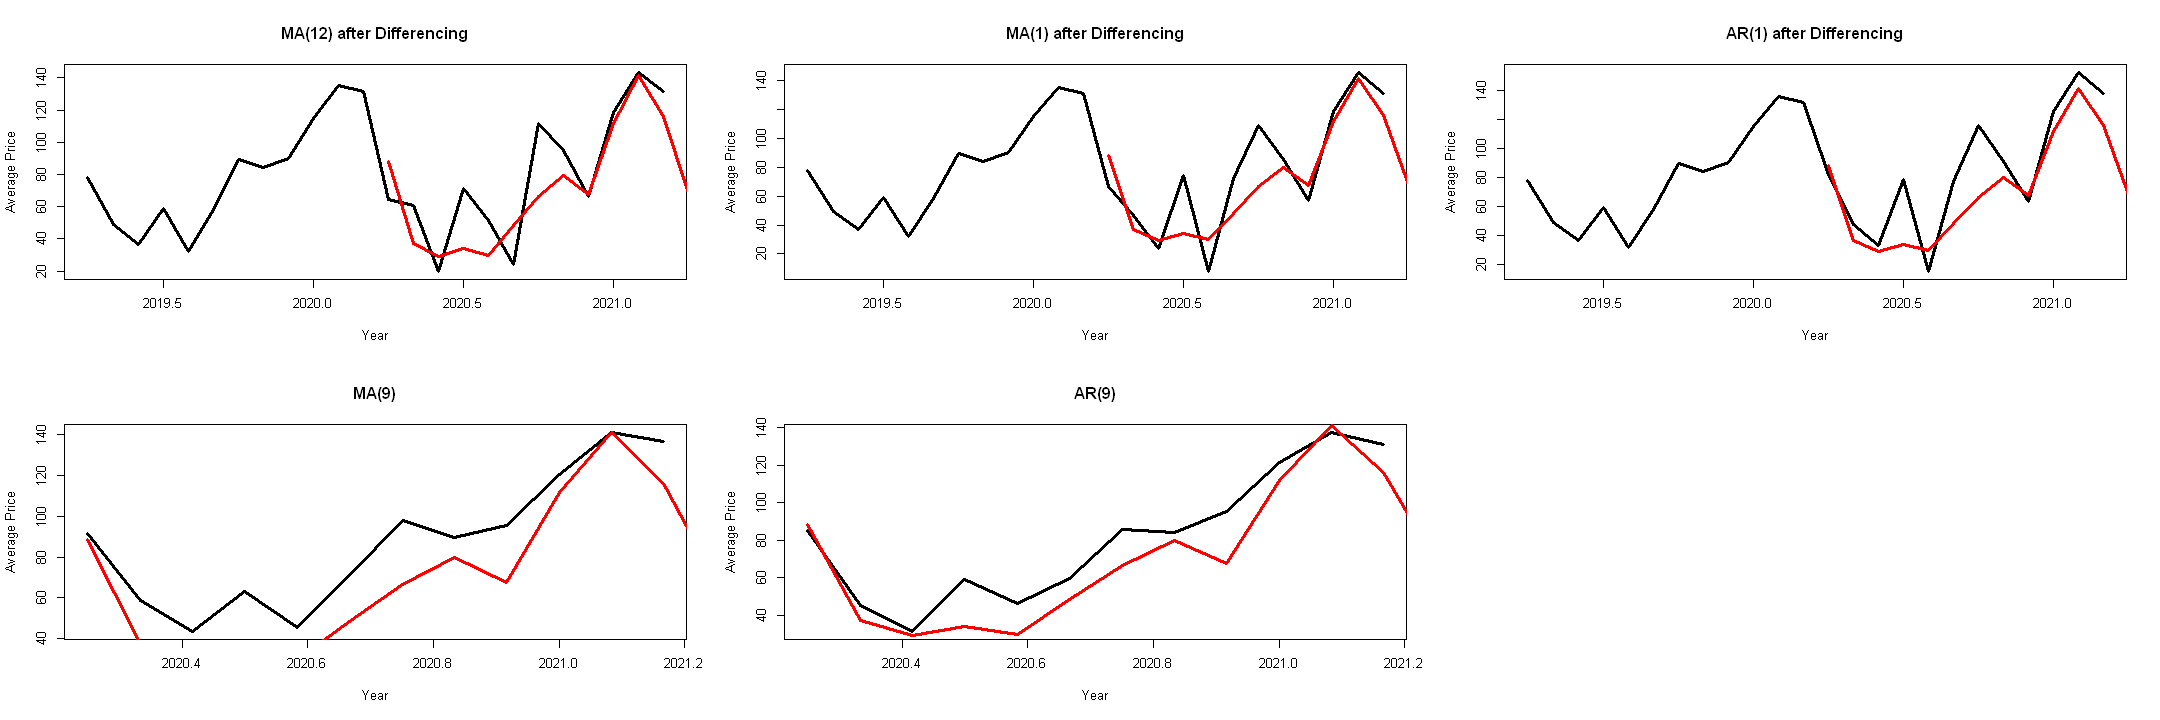

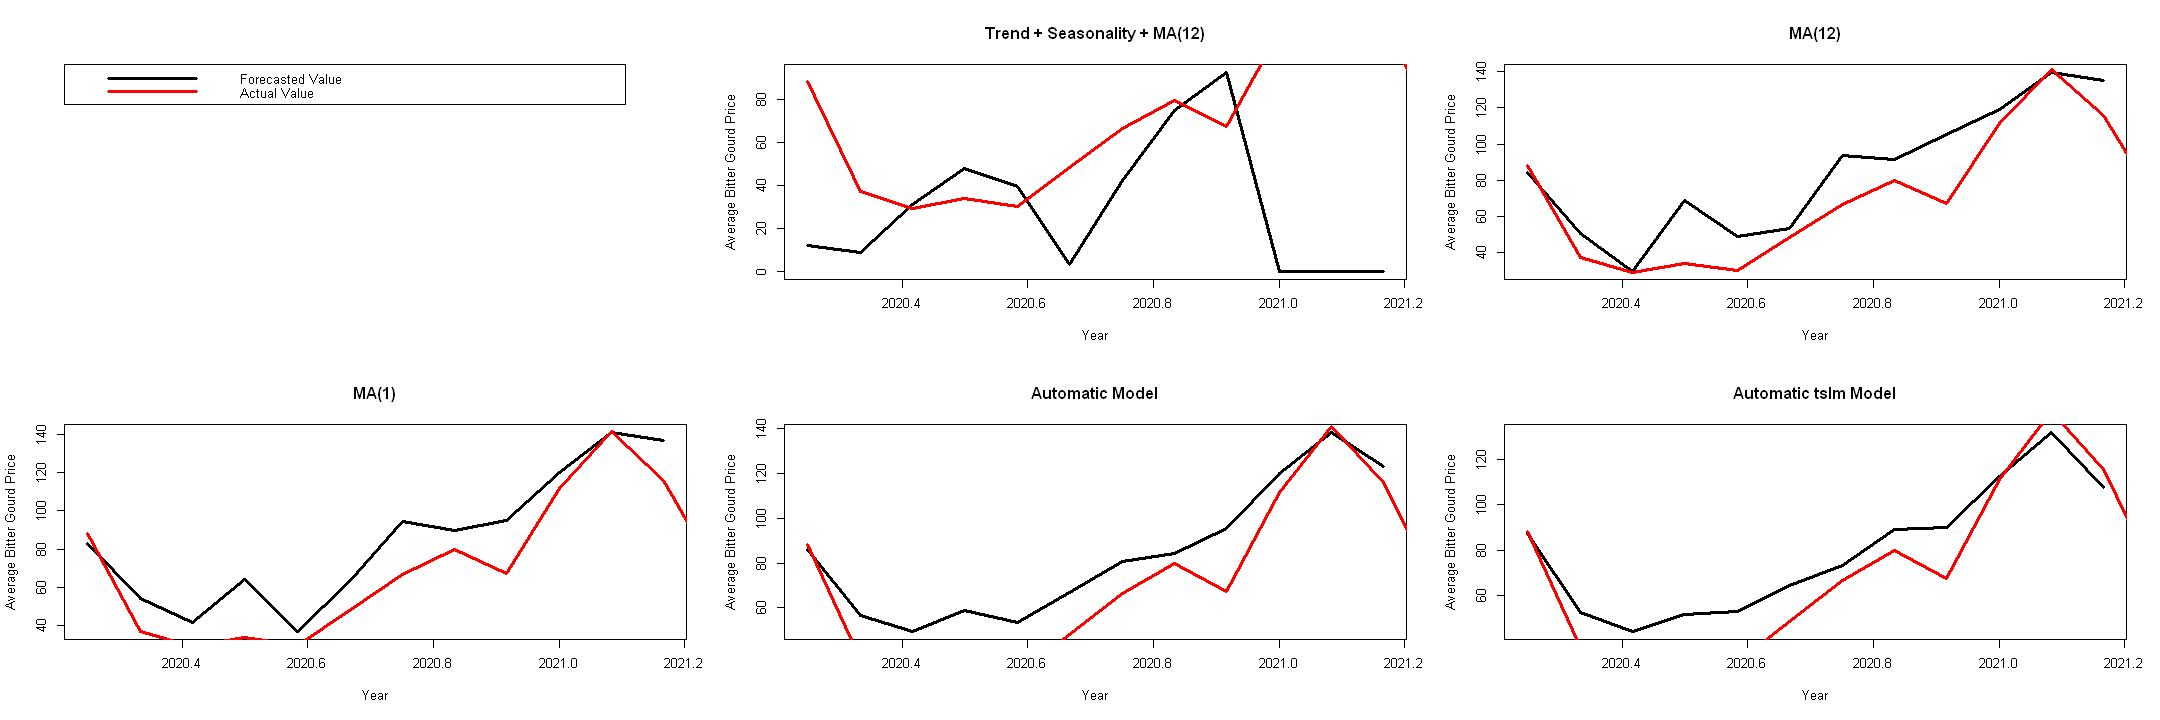

In [58]:

options(repr.plot.width=18, repr.plot.height=6)
# Visualization and plots
par(mfrow=c(2, 3))  # Setting up the plot grid for 2 rows and 3 columns

# Plot for MA(12) after differencing
plot(model.diff.MA12.prognoza.inv, main = 'MA(12) after Differencing', col = 'black', lwd = 3, xlab = 'Year', ylab= 'Average Price')
lines(test_ts, col = 'red', lwd = 3)

# Plot for MA(1) after differencing
plot(model.diff.MA1.prognoza.inv, main = 'MA(1) after Differencing', col = 'black', lwd = 3, xlab = 'Year', ylab= 'Average Price')
lines(test_ts, col = 'red', lwd = 3)

# Plot for AR(1) after differencing
plot(model.diff.AR1.prognoza.inv, main = 'AR(1) after Differencing', col = 'black', lwd = 3, xlab = 'Year', ylab= 'Average Price')
lines(test_ts, col = 'red', lwd = 3)

# Plot for MA(9)
plot(model.MA9.prognoza$mean, main = 'MA(9)', col = 'black', lwd = 3, xlab = 'Year', ylab= 'Average Price')
lines(test_ts, col = 'red', lwd = 3)

# Plot for AR(9)
plot(model.AR9.prognoza$mean, main = 'AR(9)', col = 'black', lwd = 3, xlab = 'Year', ylab= 'Average Price')
lines(test_ts, col = 'red', lwd = 3)

# Add a legend to the last plot (or to one plot outside of the loop if they share the same legend)
par(mfrow=c(2, 3))  # Setting up the plot grid for 2 rows and 3 columns
plot(1, type="n", axes=FALSE, ann=FALSE)
legend("topleft", legend=c("Forecasted Value", "Actual Value"), col=c("black", "red"), lty=1, lwd=3)

# Plot for Trend + Seasonality + MA(12)
plot(model.MA12.prognoza.tslm$mean, main = 'Trend + Seasonality + MA(12)', col = 'black', lwd = 3, xlab = 'Year', ylab= 'Average Bitter Gourd Price')
lines(test_ts, col = 'red', lwd = 3)

# Plot for MA(12)
plot(model.MA12.prognoza$mean, main = 'MA(12)', col = 'black', lwd = 3, xlab = 'Year', ylab= 'Average Bitter Gourd Price')
lines(test_ts, col = 'red', lwd = 3)

# Plot for MA(1)
plot(model.MA1.prognoza$mean, main = 'MA(1)', col = 'black', lwd = 3, xlab = 'Year', ylab= 'Average Bitter Gourd Price')
lines(test_ts, col = 'red', lwd = 3)

# Plot for automatic model
plot(model.auto.prognoza$mean, main = 'Automatic Model', col = 'black', lwd = 3, xlab = 'Year', ylab= 'Average Bitter Gourd Price')
lines(test_ts, col = 'red', lwd = 3)

# Plot for automatic tslm model
plot(model.tslm.res.auto.prognoza, main = 'Automatic tslm Model', col = 'black', lwd = 3, xlab = 'Year', ylab= 'Average Bitter Gourd Price')
lines(test_ts, col = 'red', lwd = 3)


# 11. Comparing models

In [101]:
# Load necessary libraries
library(knitr)
library(forecast) 

# Extract model metrics
model_metrics <- data.frame(
  Model = c("MA(12) after differencing", "MA(1) after differencing", "AR(1) after differencing", 
            "MA(9)", "AR(9)", "Trend + Seasonality + MA(12)", 
            "MA(12)", "MA(1)", "Automatic Model", "Automatic tslm Model"),
  
  # Use AIC function for all models, except auto.arima models which directly provide AICc
  AICc = c(AIC(model.diff.MA12.signif), AIC(model.diff.MA1.signif), AIC(model.diff.AR1.signif), 
           AIC(model.MA9.fixed), AIC(model.AR9.fixed), AIC(model.tslm.MA9.fixed), 
           AIC(model.MA12.fixed), AIC(model.MA1.fixed), AIC(model.auto), AIC(model.res.auto)),
  
  BIC = c(BIC(model.diff.MA12.signif), BIC(model.diff.MA1.signif), BIC(model.diff.AR1.signif), 
          BIC(model.MA9.fixed), BIC(model.AR9.fixed), BIC(model.tslm.MA9.fixed), 
          BIC(model.MA12.fixed), BIC(model.MA1.fixed), BIC(model.auto), BIC(model.res.auto)),
  
  RMSE = c(accuracy(model.diff.MA12.prognoza.inv, test_ts)["Test set", "RMSE"],
           accuracy(model.diff.MA1.prognoza.inv, test_ts)["Test set", "RMSE"],
           accuracy(model.diff.AR1.prognoza.inv, test_ts)["Test set", "RMSE"],
           accuracy(model.MA9.prognoza, test_ts)["Test set", "RMSE"],
           accuracy(model.AR9.prognoza, test_ts)["Test set", "RMSE"],
           accuracy(model.MA12.prognoza.tslm, test_ts)["Test set", "RMSE"],
           accuracy(model.MA12.prognoza, test_ts)["Test set", "RMSE"],
           accuracy(model.MA1.prognoza, test_ts)["Test set", "RMSE"],
           accuracy(model.auto.prognoza, test_ts)["Test set", "RMSE"],
           accuracy(model.tslm.res.auto.prognoza, test_ts)["Test set", "RMSE"]),
  
  MAE = c(accuracy(model.diff.MA12.prognoza.inv, test_ts)["Test set", "MAE"],
          accuracy(model.diff.MA1.prognoza.inv, test_ts)["Test set", "MAE"],
          accuracy(model.diff.AR1.prognoza.inv, test_ts)["Test set", "MAE"],
          accuracy(model.MA9.prognoza, test_ts)["Test set", "MAE"],
          accuracy(model.AR9.prognoza, test_ts)["Test set", "MAE"],
          accuracy(model.MA12.prognoza.tslm, test_ts)["Test set", "MAE"],
          accuracy(model.MA12.prognoza, test_ts)["Test set", "MAE"],
          accuracy(model.MA1.prognoza, test_ts)["Test set", "MAE"],
          accuracy(model.auto.prognoza, test_ts)["Test set", "MAE"],
          accuracy(model.tslm.res.auto.prognoza, test_ts)["Test set", "MAE"]),
  
  ME = c(accuracy(model.diff.MA12.prognoza.inv, test_ts)["Test set", "ME"],
         accuracy(model.diff.MA1.prognoza.inv, test_ts)["Test set", "ME"],
         accuracy(model.diff.AR1.prognoza.inv, test_ts)["Test set", "ME"],
         accuracy(model.MA9.prognoza, test_ts)["Test set", "ME"],
         accuracy(model.AR9.prognoza, test_ts)["Test set", "ME"],
         accuracy(model.MA12.prognoza.tslm, test_ts)["Test set", "ME"],
         accuracy(model.MA12.prognoza, test_ts)["Test set", "ME"],
         accuracy(model.MA1.prognoza, test_ts)["Test set", "ME"],
         accuracy(model.auto.prognoza, test_ts)["Test set", "ME"],
         accuracy(model.tslm.res.auto.prognoza, test_ts)["Test set", "ME"]),
  
  MAPE = c(accuracy(model.diff.MA12.prognoza.inv, test_ts)["Test set", "MAPE"],
           accuracy(model.diff.MA1.prognoza.inv, test_ts)["Test set", "MAPE"],
           accuracy(model.diff.AR1.prognoza.inv, test_ts)["Test set", "MAPE"],
           accuracy(model.MA9.prognoza, test_ts)["Test set", "MAPE"],
           accuracy(model.AR9.prognoza, test_ts)["Test set", "MAPE"],
           accuracy(model.MA12.prognoza.tslm, test_ts)["Test set", "MAPE"],
           accuracy(model.MA12.prognoza, test_ts)["Test set", "MAPE"],
           accuracy(model.MA1.prognoza, test_ts)["Test set", "MAPE"],
           accuracy(model.auto.prognoza, test_ts)["Test set", "MAPE"],
           accuracy(model.tslm.res.auto.prognoza, test_ts)["Test set", "MAPE"]),
  
  MPE = c(accuracy(model.diff.MA12.prognoza.inv, test_ts)["Test set", "MPE"],
          accuracy(model.diff.MA1.prognoza.inv, test_ts)["Test set", "MPE"],
          accuracy(model.diff.AR1.prognoza.inv, test_ts)["Test set", "MPE"],
          accuracy(model.MA9.prognoza, test_ts)["Test set", "MPE"],
          accuracy(model.AR9.prognoza, test_ts)["Test set", "MPE"],
          accuracy(model.MA12.prognoza.tslm, test_ts)["Test set", "MPE"],
          accuracy(model.MA12.prognoza, test_ts)["Test set", "MPE"],
          accuracy(model.MA1.prognoza, test_ts)["Test set", "MPE"],
          accuracy(model.auto.prognoza, test_ts)["Test set", "MPE"],
          accuracy(model.tslm.res.auto.prognoza, test_ts)["Test set", "MPE"])
)

# Create the table using knitr::kable
kable(model_metrics, caption = "Model Comparison Metrics")




Table: Model Comparison Metrics

|Model                        |     AICc|      BIC|     RMSE|      MAE|         ME|     MAPE|       MPE|
|:----------------------------|--------:|--------:|--------:|--------:|----------:|--------:|---------:|
|MA(12) after differencing    | 517.0916| 531.2690| 22.76890| 18.78431|  -9.083327| 38.56091| -20.20460|
|MA(1) after differencing     | 557.3428| 561.3935| 21.42663| 17.36834|  -7.432415| 34.99066| -12.94786|
|AR(1) after differencing     | 583.9246| 587.9753| 23.28312| 18.24549| -14.178265| 35.03429| -24.95195|
|MA(9)                        | 561.4735| 570.4099| 19.71238| 17.14859| -17.080954| 35.24377| -35.19588|
|AR(9)                        | 550.6067| 561.7772| 14.73456| 12.24194| -10.984737| 23.77337| -22.64135|
|Trend + Seasonality + MA(12) | 887.9896| 895.2097| 68.28561| 49.79888|  41.382563| 59.54376|  40.09634|
|MA(12)                       | 546.6401| 555.5765| 19.35495| 15.11065| -14.141616| 29.46320| -28.49961|
|MA(1)              

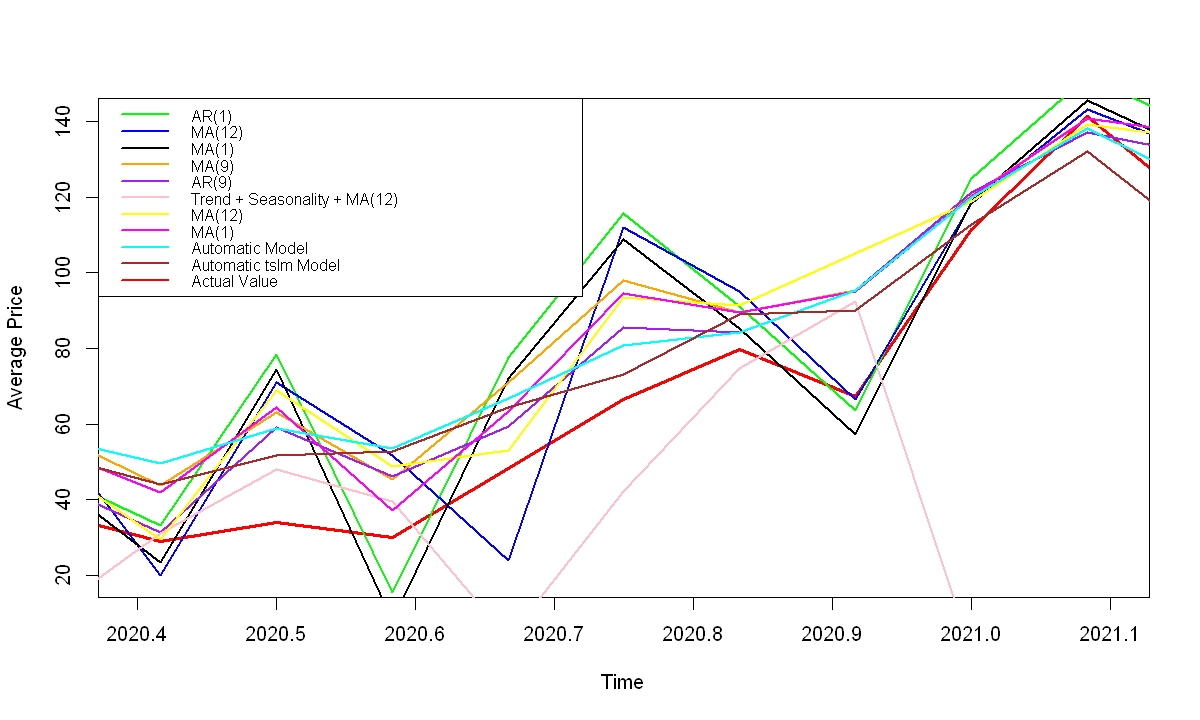

In [105]:
# Setting up the plot with adjusted x-axis limits
options(repr.plot.width=10, repr.plot.height=6)
plot(test_ts, type = "l", col = "red", lwd = 3, xlab = "Time", ylab = "Average Price", 
     xlim = c(2020.4, 2021.1))  # Adjust xlim to trim the right side

# Adding lines for each model's forecast
lines(model.diff.AR1.prognoza.inv, col = "green", lwd = 2)
lines(model.diff.MA12.prognoza.inv, col = "blue", lwd = 2)
lines(model.diff.MA1.prognoza.inv, col = "black", lwd = 2)
lines(model.MA9.prognoza$mean, col = "orange", lwd = 2)
lines(model.AR9.prognoza$mean, col = "purple", lwd = 2)
lines(model.MA12.prognoza.tslm$mean, col = "pink", lwd = 2)
lines(model.MA12.prognoza$mean, col = "yellow", lwd = 2)
lines(model.MA1.prognoza$mean, col = "magenta", lwd = 2)
lines(model.auto.prognoza$mean, col = "cyan", lwd = 2)
lines(model.tslm.res.auto.prognoza, col = "brown", lwd = 2)

# Adding a legend
legend("topleft", 
       legend = c("AR(1)", "MA(12)", "MA(1)", "MA(9)", "AR(9)", 
                  "Trend + Seasonality + MA(12)", "MA(12)", 
                  "MA(1)", "Automatic Model", "Automatic tslm Model", 
                  "Actual Value"), 
       col = c("green", "blue", "black", "orange", "purple", 
               "pink", "yellow", "magenta", "cyan", "brown", "red"), 
       lty = 1, lwd = 2, cex = 0.8)




### MA(12) after Differencing:
A Moving Average (MA) model with a lag of 12, applied after differencing.  
Despite lower AICc and BIC values, this model has higher prediction errors (RMSE and MAE) than other models.

### MA(1) after Differencing:
A Moving Average (MA) model with a lag of 1, applied after differencing.  
It has lower AICc and BIC values than the MA(12) after differencing, but also higher RMSE and MAE.

### AR(1) after Differencing:
An Autoregressive (AR) model of order 1, applied after differencing.  
It shows higher AICc and BIC values, as well as higher RMSE and MAE, than the MA(12) and MA(1) models after differencing.

### MA(9):
A Moving Average (MA) model with a lag of 9.  
It has higher AICc and BIC values than the MA(1) after differencing, and also higher RMSE and MAE.

### AR(9):
An Autoregressive (AR) model of order 9.  
It exhibits the low AICc and BIC values, as well as the lowest RMSE and MAE compared to other models.

### Trend + Seasonality + MA(12):
A model with trend, seasonality, and a Moving Average (MA) with a lag of 12.  
It has the highest AICc and BIC values, as well as the highest RMSE and MAE among all models.

### MA(12):
A Moving Average (MA) model with a lag of 12.  
It has lower AICc and BIC values than the Trend + Seasonality + MA(12) model, but higher RMSE and MAE.

### MA(1):
A Moving Average (MA) model with a lag of 1.  
It has lower AICc and BIC values than the MA(12) and Trend + Seasonality + MA(12) models, but higher RMSE and MAE.

### Automatic Model:
An automatically fitted time series model.  
It has similar AICc and BIC values to the AR(9) model after differencing, but higher RMSE and MAE.

### Automatic tslm Model:
An automatically fitted time series model using the tslm (time series linear model) method.  
It exhibits the highest AICc and BIC values, as well as the highest RMSE and MAE compared to other models.


## The best model

In conclusion, the AR(9) model appears to be the best model, as it has some of the lowest AICc and BIC values, as well as the lowest RMSE and the second lowest MAE among the analyzed models. This indicates that the model has the best predictive ability on the test set. Additionally, its MPE value suggests that there is no systematic bias in its predictions.


__AR(9) Model Equation__


$$
Y_t = -0.6444Y_{t-1} - 0.5547Y_{t-2} - 0.5076Y_{t-3} - 0.1369Y_{t-4} - 0.1412Y_{t-5} - 0.1021Y_{t-6} - 0.1234Y_{t-7} - 0.4076Y_{t-8} + 0.0544Y_{t-9} + \epsilon_t
$$

where:

- $\epsilon_t$ is the error term = 117.34


# 12. Summary

The objective of this project was to analyze the time series data of Bitter Gourd prices over the period from 2013 to 2021, and to develop predictive models that accurately forecast future prices. The analysis aimed to identify the most suitable model for this time series data by comparing various statistical methods and models.

## Objectives and Approach

1. **Data Preparation**:
   - The raw data contained daily price information for various fruits and vegetables over a span of nine years. The focus was narrowed to Bitter Gourd, with daily prices aggregated into monthly averages for analysis.
   - Data cleaning was performed to address missing values and outliers, followed by calendar adjustments to account for differences in the number of days in each month.

2. **Modeling Techniques**:
   - Several time series models were developed and evaluated. These included Moving Average (MA) models, Autoregressive (AR) models, and a combined Trend + Seasonality + MA model. Additionally, automatic model selection using the `auto.arima` function and linear models (`tslm`) was also explored.
   - The models were evaluated using metrics such as Akaike Information Criterion corrected (AICc), Bayesian Information Criterion (BIC), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and Mean Percentage Error (MPE).

## Results and Findings

After evaluating multiple models, the **AR(9)** model was found to be the most effective in forecasting the Bitter Gourd prices. Key statistics for the AR(9) model include:

- **AICc**: 550.6067
- **BIC**: 561.7724
- **RMSE**: 14.7346
- **MAE**: 12.2419
- **MPE**: -22.64135
- **MAPE**: 23.77337 

These metrics indicate that the AR(9) model had one of the lowest prediction errors, making it the best model among those tested. Additionally, the low MPE value suggests that the model does not exhibit systematic bias in its predictions.

## Conclusion

In conclusion, the AR(9) model was identified as the best performing model for predicting Bitter Gourd prices, demonstrating the effectiveness of autoregressive models in capturing the underlying patterns in the time series data. The success of this model can be attributed to its ability to balance complexity and predictive accuracy, as indicated by its favorable AICc, BIC, RMSE, and MAE metrics.
